Mohannad Zahaykah - ID: 086962412

David Greiver- ID: 317267656

Neta Zeitak -ID: 209572841

# משנה מקום משנה מזל: The Different Effects Of Location On Accomodation Pricing
In the following work we attempt to answer the general question: how and when does the location of an accomodation asset affect its price?
To answer this question, we will use data of AirBNB assets from 10 capital cities around the world.
As "location" can be variusly interperated, we chose to focus in this initial attempt on a few aspects:
1. location as the asset's distance from the city center, assuming centrality can be attractive for tourists- but might also have downsides (e.g. noise).
2. location as the asset's neighborhood socio-economic level.


In [135]:
#@title Helper Functions and Imports
from google.colab import output
output.enable_custom_widget_manager()
from pydrive2.auth import GoogleAuth
from google.colab import drive
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

sns.set()
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 14



AIRBNB_REVIEWS_ID = "1lWUQ5Z4drNPwWdx95mdiHT7x2hzry0a7"
AIRBNB_LISTINGS_ID = "1lrBZ6lQ03ZuRn0xe17XZ76TI-kJxa5HB"
AIRBNB_REVIEWS_DICTIONARY_ID = "1z4IMuVxGQh2EAzh2XXyFJKFuAu8fd6JI"
AIRBNB_LISTINGS_DICTIONARY_ID = "1PA0YmAafhWCqVYV2DlERoPrOJEsm8SQX"


def load_df(drive_id, **load_kwargs):
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)
  download = drive.CreateFile({'id': drive_id})
  filename = '{}.csv'.format(drive_id)
  download.GetContentFile(filename)
  return pd.read_csv(filename, **load_kwargs)

### AirBnB Listings

In [136]:
#@title Load Data
listings_df = load_df(AIRBNB_LISTINGS_ID, encoding='ISO-8859-1', dtype={"host_response_time": object, "district": object})
listings_df.set_index("listing_id",inplace=True)
listings_dictionary_df = load_df(AIRBNB_LISTINGS_DICTIONARY_ID)
reviews_df = load_df(AIRBNB_REVIEWS_ID)
reviews_dictionary_df = load_df(AIRBNB_REVIEWS_DICTIONARY_ID)

In [137]:
print(listings_df.head())

                                                        name   host_id  \
listing_id                                                               
281420        Beautiful Flat in le Village Montmartre, Paris   1466919   
3705183                      39 mÃÂ² Paris (Sacre CÃâur)  10328771   
4082273                  Lovely apartment with Terrace, 60m2  19252768   
4797344                  Cosy studio (close to Eiffel tower)  10668311   
4823489     Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   

            host_since                 host_location host_response_time  \
listing_id                                                                
281420      2011-12-03  Paris, Ile-de-France, France                NaN   
3705183     2013-11-29  Paris, Ile-de-France, France                NaN   
4082273     2014-07-31  Paris, Ile-de-France, France                NaN   
4797344     2013-12-17  Paris, Ile-de-France, France                NaN   
4823489     2014-12-14  Paris, 

In [138]:
#@title Inspect Listings Data
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279712 entries, 281420 to 40219504
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         279537 non-null  object 
 1   host_id                      279712 non-null  int64  
 2   host_since                   279547 non-null  object 
 3   host_location                278872 non-null  object 
 4   host_response_time           150930 non-null  object 
 5   host_response_rate           150930 non-null  float64
 6   host_acceptance_rate         166625 non-null  float64
 7   host_is_superhost            279547 non-null  object 
 8   host_total_listings_count    279547 non-null  float64
 9   host_has_profile_pic         279547 non-null  object 
 10  host_identity_verified       279547 non-null  object 
 11  neighbourhood                279712 non-null  object 
 12  district                     37012 non-null   object 
 1

In [139]:
#@title Inspect Columns Description
listings_dictionary_df

Field  \
0                    listing_id   
1                          name   
2                       host_id   
3                    host_since   
4                 host_location   
5            host_response_time   
6            host_response_rate   
7          host_acceptance_rate   
8             host_is_superhost   
9     host_total_listings_count   
10         host_has_profile_pic   
11       host_identity_verified   
12                neighbourhood   
13                     district   
14                         city   
15                     latitude   
16                    longitude   
17                property_type   
18                    room_type   
19                 accommodates   
20                     bedrooms   
21                    amenities   
22                        price   
23               minimum_nights   
24               maximum_nights   
25         review_scores_rating   
26       review_scores_accuracy   
27    review_scores_cleanliness   
28        review_scores_checkin   
29  review_scores_communication   
30       review_scores_location   
31          review_scores_value   
32             instant_bookable   

                                          Description  
0                                          Listing ID  
1                                        Listing Name  
2                                             Host ID  
3                         Date the Host joined Airbnb  
4                    Location where the Host is based  
5      Estimate of how long the Host takes to respond  
6               Percentage of times the Host responds  
7   Percentage of times the Host accepts a booking...  
8   Binary field to determine if the Host is a Sup...  
9               Total listings the Host has in Airbnb  
10  Binary field to determine if the Host has a pr...  
11  Binary field to determine if the Host has a ve...  
12                     Neighborhood the Listing is in  
13                         District the Listing is in  
14                             City the Listing is in  
15                                 Listing's latitude  
16                                Listing's longitude  
17                   Type of property for the Listing  
18        Type of room type in Airbnb for the Listing  
19                     Guests the Listing accomodates  
20                            Bedrooms in the Listing  
21                     Amenities the Listing includes  
22         Listing price (in each country's currency)  
23                         Minimum nights per booking  
24                         Maximum nights per booking  
25              Listing's overall rating (out of 100)  
26  Listing's accuracy score based on what's promo...  
27            Listing's cleanliness score (out of 10)  
28    Listing's check-in experience score (out of 10)  
29  Listing's communication with the Host score (o...  
30  Listing's location score within the city (out ...  
31  Listing's value score relative to its price (o...  
32  Binary field to determine if the Listing can b...

In [140]:
#@title Inspect Review Data
reviews_df

listing_id  review_id        date  reviewer_id
0             11798  330265172  2018-09-30     11863072
1             15383  330103585  2018-09-30     39147453
2             16455  329985788  2018-09-30      1125378
3             17919  330016899  2018-09-30    172717984
4             26827  329995638  2018-09-30     17542859
...             ...        ...         ...          ...
5373138    47779342  726766332  2021-01-25    283094516
5373139    47823964  727963021  2021-01-31     76411977
5373140    47896175  728548625  2021-02-02     71370946
5373141    47900451  727399287  2021-01-29    109011160
5373142    47998038  730320626  2021-02-11    276790978

[5373143 rows x 4 columns]

In [141]:
#@title Inspect Review Data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB


# EDA
Our analysis depends on formatin the data, so EDA process will make sure that data includes-
1. numerical features only
2. the most relevant features- features that are correlated with the target feature "price", but are minimally correlated between them.
3. no Nan values

Additionally, some of the features had to be converted to appropriate units of measure, and normalize to rule out the effect of irrelevant variables.
The following section addresses these objectives.

# Replace Nan values and Converting Non-Numerical data to Numerical data

We checked what is the distribution of the features that had Nan values. In the following code we replaced Nan with the median of the feature, if it had skewed distribution. If the feature distributed more symetrically, we replaced Nans with the mean. We made the decisions according to the graphs below.

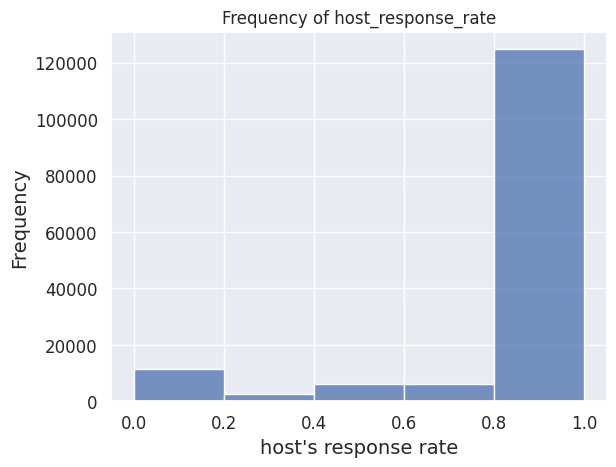

In [142]:
# @title
# Plot a histogram (histplot in Seaborn)
sns.histplot(listings_df['host_response_rate'].dropna(), bins=5, kde=False)

# Add labels and title
plt.xlabel(f"host's response rate")
plt.ylabel('Frequency')
plt.title('Frequency of host_response_rate')

# Show the plot
plt.show()

Replacing Nan values in 'host_response_rate' with the median

In [143]:
# @title
# Calculate the median of the 'host_response_rate' column, ignoring NaN values because the data appears skewed toward the higher end (closer to 1)
median_host_response_rate = listings_df['host_response_rate'].median()

listings_df['host_response_rate'].fillna(median_host_response_rate, inplace=True)
print(listings_df['host_response_rate'].unique())

[1.   0.   0.5  0.67 0.9  0.86 0.83 0.8  0.75 0.88 0.79 0.89 0.94 0.71
 0.95 0.3  0.25 0.6  0.33 0.43 0.2  0.84 0.4  0.92 0.17 0.97 0.87 0.38
 0.7  0.58 0.76 0.78 0.44 0.91 0.1  0.14 0.57 0.56 0.05 0.77 0.98 0.96
 0.93 0.72 0.29 0.63 0.11 0.68 0.69 0.81 0.82 0.73 0.85 0.46 0.22 0.99
 0.23 0.13 0.36 0.12 0.47 0.55 0.06 0.08 0.09 0.62 0.65 0.64 0.28 0.53
 0.39 0.59 0.41 0.27 0.31 0.74 0.03 0.52 0.04 0.54 0.61 0.21 0.07 0.45
 0.42 0.51 0.48 0.19 0.15 0.01 0.24]


<ipython-input-143-854382873ab2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['host_response_rate'].fillna(median_host_response_rate, inplace=True)


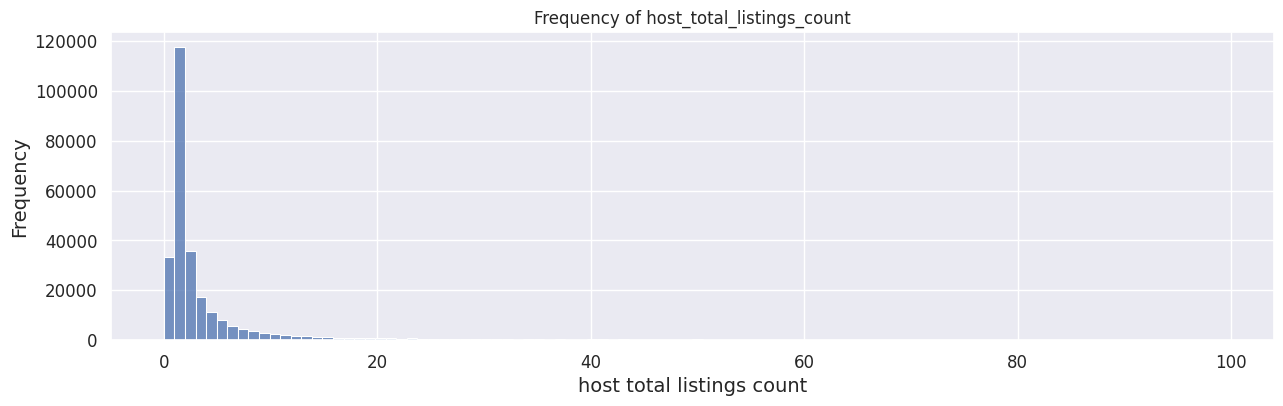

In [144]:
# @title
# Plot a histogram (histplot in Seaborn)
plt.figure(figsize=(15, 4))
sns.histplot(listings_df['host_total_listings_count'][listings_df['host_total_listings_count'] < 100].dropna(), bins=100, kde=False)

# Add labels and title
plt.xlabel('host total listings count')
plt.ylabel('Frequency')
plt.title('Frequency of host_total_listings_count')

# Show the plot
plt.show()

Replacing Nan values in 'host_total_listings_count' with the median

In [145]:
# @title
# Calculate the median of the 'host_total_listings_count' column
median_host_total_listings_count = listings_df['host_total_listings_count'].median()

# Fill NaN values with the calculated median
listings_df['host_total_listings_count'].fillna(median_host_total_listings_count, inplace=True)

# Display the unique values to confirm the changes
print(listings_df['host_total_listings_count'].unique())

[1.000e+00 1.860e+02 1.000e+02 9.400e+01 7.700e+01 4.500e+01 2.000e+00
 7.800e+01 2.790e+02 2.460e+02 0.000e+00 4.200e+01 4.770e+02 4.000e+00
 2.100e+01 1.800e+01 4.300e+01 7.000e+00 5.000e+00 1.500e+01 2.600e+01
 9.000e+00 2.000e+01 4.000e+01 3.200e+01 3.000e+00 8.000e+00 3.100e+01
 1.250e+02 5.100e+01 1.300e+01 2.900e+01 9.600e+01 2.300e+01 1.600e+01
 3.000e+01 1.890e+02 2.700e+01 6.000e+00 2.500e+01 2.400e+01 3.800e+01
 6.200e+01 6.600e+01 1.000e+01 4.400e+01 1.110e+02 1.200e+01 3.300e+01
 1.100e+01 6.100e+01 1.900e+01 7.200e+01 3.500e+01 1.160e+02 2.750e+02
 1.220e+02 3.400e+02 1.460e+02 4.800e+01 1.400e+01 1.700e+01 1.350e+02
 4.600e+01 5.300e+01 3.860e+02 3.600e+01 5.800e+01 3.400e+01 4.700e+01
 4.240e+02 3.900e+01 2.390e+02 2.140e+02 1.150e+02 6.400e+01 5.700e+01
 2.410e+02 7.400e+01 2.800e+01 1.105e+03 2.200e+01 7.100e+01 4.100e+01
 9.900e+01 8.300e+01 1.190e+02 3.700e+01 4.900e+01 5.000e+01 1.507e+03
 6.960e+02 6.500e+01 1.300e+02 1.390e+02 7.000e+01 1.990e+02 3.230e+02
 8.500

<ipython-input-145-4ef1c7f58c6c>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['host_total_listings_count'].fillna(median_host_total_listings_count, inplace=True)


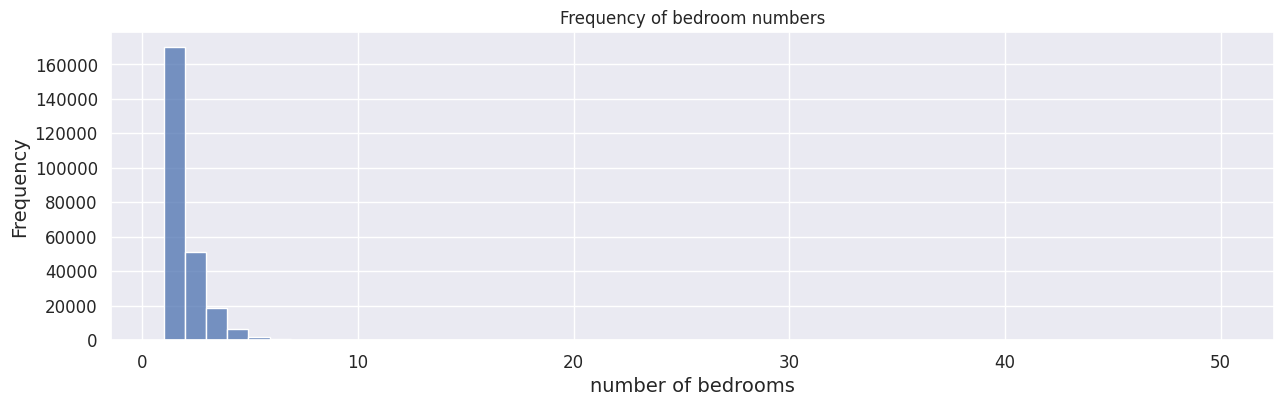

In [146]:
# @title
plt.figure(figsize=(15, 4))
sns.histplot(listings_df['bedrooms'].dropna(), bins=50, kde=False)

# Add labels and title
plt.xlabel('number of bedrooms')
plt.ylabel('Frequency')
plt.title('Frequency of bedroom numbers')

# Show the plot
plt.show()

Replacing Nan values in 'bedrooms' with the median

In [147]:
# @title
# Calculate the median of the 'bedrooms' column
median_bedrooms = listings_df['bedrooms'].median()

# Fill NaN values with the calculated median
listings_df['bedrooms'].fillna(median_bedrooms, inplace=True)

# Display the first few rows to confirm the changes
print(listings_df[['bedrooms']].head())

            bedrooms
listing_id          
281420           1.0
3705183          1.0
4082273          1.0
4797344          1.0
4823489          1.0


<ipython-input-147-9ebf00b3b97e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['bedrooms'].fillna(median_bedrooms, inplace=True)


Changing the non-numerical column "host_response_time" to numerical values. Then, we replaces the Nan values with the median of the rest of the values.

In [148]:
# @title
response_time_mapping = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}

listings_df['host_response_time'] = listings_df['host_response_time'].map(response_time_mapping)

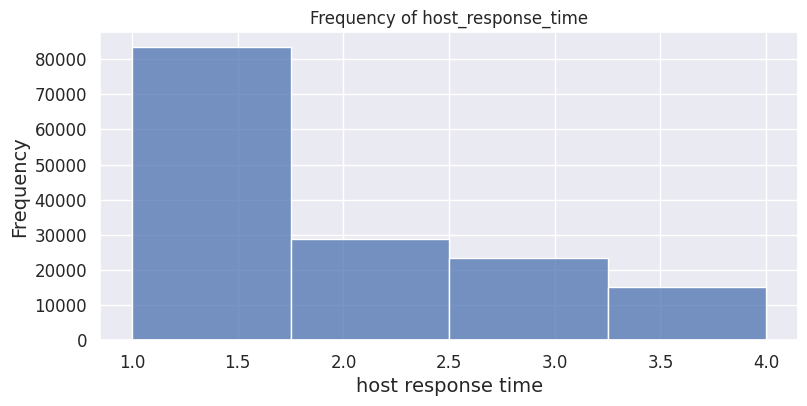

In [149]:
# @title
plt.figure(figsize=(9, 4))
sns.histplot(listings_df['host_response_time'].dropna(), bins=4, kde=False)

# Add labels and title
plt.xlabel('host response time')
plt.ylabel('Frequency')
plt.title('Frequency of host_response_time')

# Show the plot
plt.show()

In [150]:
# @title
median_response_time = listings_df['host_response_time'].median()

listings_df['host_response_time'].fillna(median_response_time, inplace=True)

print(listings_df['host_response_time'].head())

listing_id
281420     1.0
3705183    1.0
4082273    1.0
4797344    1.0
4823489    1.0
Name: host_response_time, dtype: float64


<ipython-input-150-10e1501e86b0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['host_response_time'].fillna(median_response_time, inplace=True)


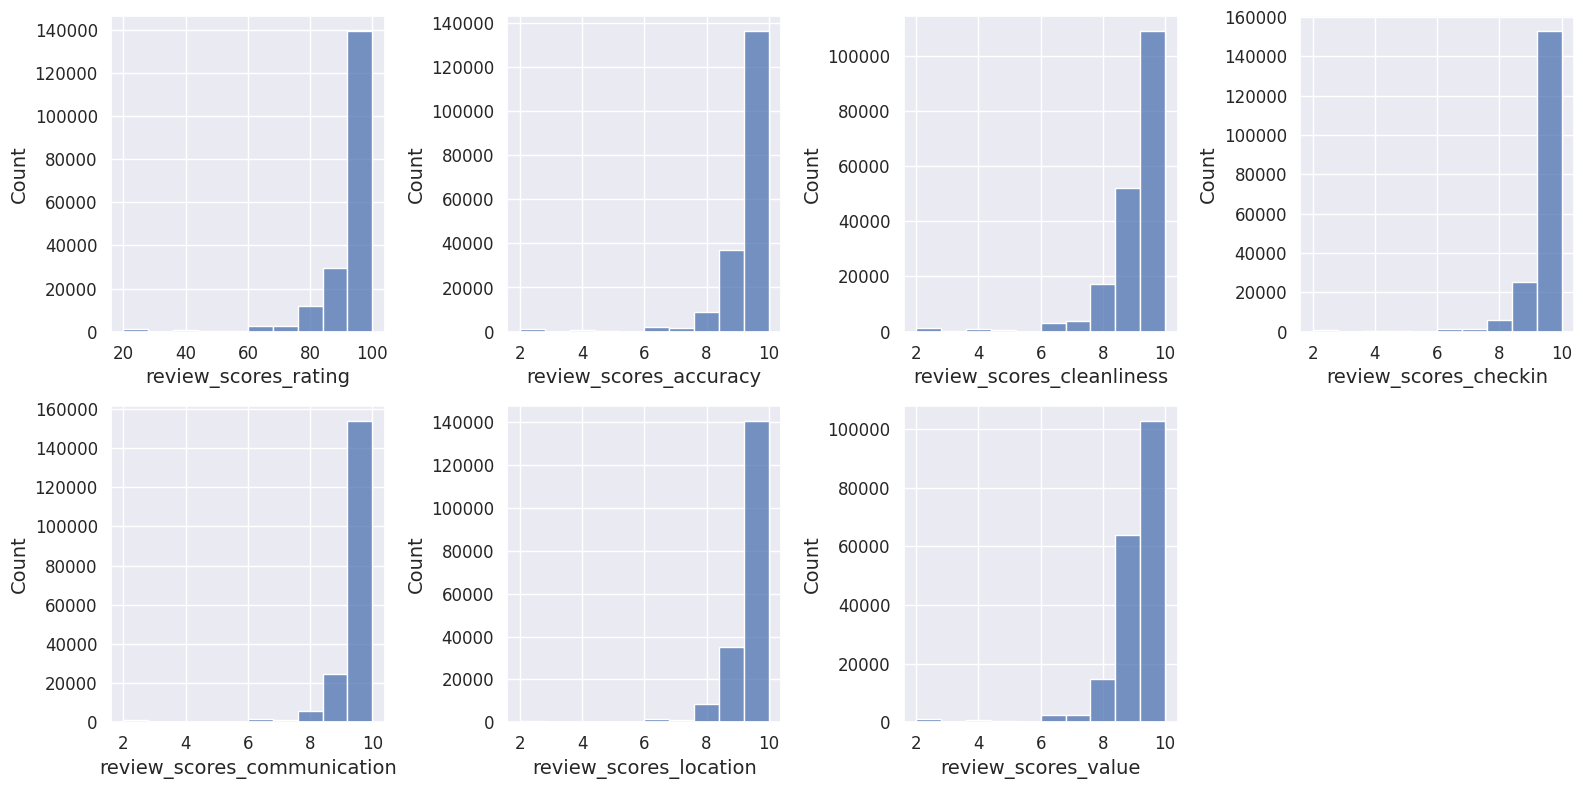

In [151]:
# @title
# List of review score columns
review_score_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

# Create a 2x4 grid (last subplot empty)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot the 7 histograms
for i in range(7):
    sns.histplot(listings_df[review_score_columns[i]], bins=10, ax=axes[i])

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Replacing Nan values in review scores columns with the median of each column

In [152]:
# @title
medians = listings_df[review_score_columns].median()
for col in review_score_columns:
    listings_df[col].fillna(medians[col],inplace=True)

<ipython-input-152-aa9f807f0aad>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df[col].fillna(medians[col],inplace=True)


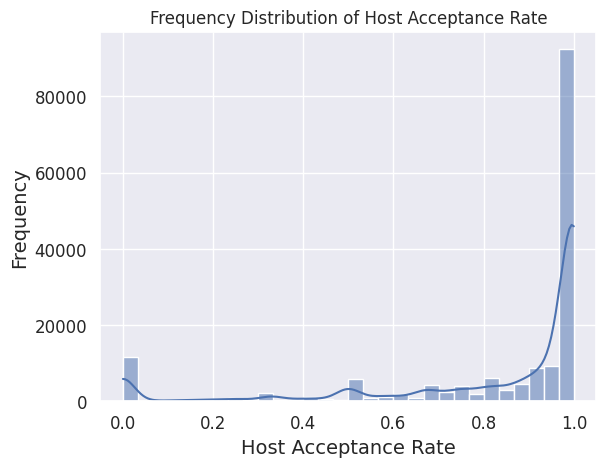

In [153]:
# @title
sns.histplot(listings_df['host_acceptance_rate'], bins=30, kde=True)

# Display the plot
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Host Acceptance Rate')
plt.show()

Replacing Nan values in 'host_acceptance_rate' with the mean.

In [154]:
# @title
# Calculate the median of the 'host_acceptance_rate' column, ignoring NaN values
median_host_acceptance_rate = listings_df['host_acceptance_rate'].median()
listings_df['host_acceptance_rate'].fillna(median_host_acceptance_rate, inplace=True)
print(listings_df['host_acceptance_rate'].unique())

[0.98 1.   0.   0.47 0.33 0.5  0.67 0.1  0.8  0.83 0.71 0.25 0.75 0.93
 0.95 0.77 0.88 0.6  0.78 0.94 0.91 0.96 0.9  0.89 0.85 0.63 0.38 0.92
 0.86 0.55 0.87 0.64 0.56 0.97 0.2  0.4  0.11 0.43 0.46 0.58 0.32 0.73
 0.79 0.3  0.99 0.36 0.7  0.84 0.82 0.57 0.44 0.29 0.17 0.21 0.14 0.22
 0.39 0.81 0.31 0.26 0.59 0.62 0.76 0.69 0.13 0.68 0.24 0.72 0.54 0.61
 0.53 0.65 0.74 0.66 0.09 0.18 0.27 0.51 0.42 0.48 0.08 0.23 0.45 0.35
 0.15 0.06 0.28 0.41 0.49 0.34 0.52 0.04 0.03 0.07 0.05 0.19 0.37 0.12
 0.02 0.01 0.16]


<ipython-input-154-aebcb5584b53>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['host_acceptance_rate'].fillna(median_host_acceptance_rate, inplace=True)


Changing the non-numerical column "room_type" to numerical values using get_dummies.

In [155]:
# @title
# Create dummy variables for the 'room_type' column
room_type_dummies = pd.get_dummies(listings_df['room_type'], prefix='room_type')
room_type_dummies = room_type_dummies.astype(int)

# Display the first few rows to confirm the changes
room_type_dummies.head()

listings_df = pd.concat([listings_df, room_type_dummies],axis=1)

Converint 'host_since' to a format of age (not since when, but rather - how long), and then replacing Nans with avarage.

In [156]:
# @title
# Convert 'host_since' to datetime format
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'], format='%Y-%m-%d')

# Calculate the number of days from the 'host_since' date until today
listings_df['days_since_host'] = (pd.Timestamp('today') - listings_df['host_since']).dt.days

# Replace the original 'host_since' column with the calculated number of days
listings_df['host_since'] = listings_df['days_since_host']

# Drop the temporary 'days_since_host' column
listings_df.drop(columns=['days_since_host'], inplace=True)

# Convert the number of days to years
listings_df['host_since_years'] = listings_df['host_since'] / 365

# Replace the original 'host_since' column with the number of years
listings_df['host_since'] = listings_df['host_since_years']

# Drop the temporary 'host_since_years' column
listings_df.drop(columns=['host_since_years'], inplace=True)

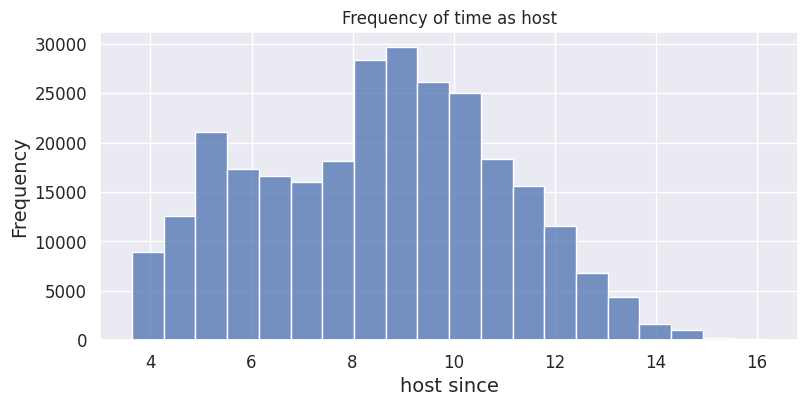

In [157]:
# @title
plt.figure(figsize=(9, 4))
sns.histplot(listings_df['host_since'].dropna(), bins=20, kde=False)

# Add labels and title
plt.xlabel('host since')
plt.ylabel('Frequency')
plt.title('Frequency of time as host')

# Show the plot
plt.show()

Replacing Nans in time as a host with the avarage.

In [158]:
# @title
# Calculate the average (mean) of the 'host_since' column, ignoring NaN values
average_host_since_years = listings_df['host_since'].mean()

# Replace NaN values with the calculated average
listings_df['host_since'].fillna(average_host_since_years, inplace=True)

# Display the first few rows to confirm the changes
print(listings_df[['host_since']].head())

            host_since
listing_id            
281420       12.876712
3705183      10.884932
4082273      10.216438
4797344      10.835616
4823489       9.843836


<ipython-input-158-b377b8b51712>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['host_since'].fillna(average_host_since_years, inplace=True)


Review room types distribution.

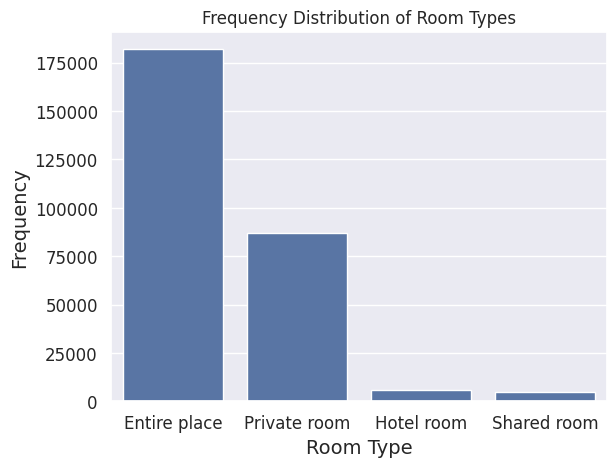

In [159]:
# @title
room_type_frequency = listings_df['room_type'].value_counts()
# Plot the frequency of room types using sns.barplot
sns.barplot(x=room_type_frequency.index, y=room_type_frequency.values)

# Add labels and title to the plot
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Room Types')

# Display the plot
plt.show()

Change T,F columns 'host_has_profile_pic','instant_bookable' and 'host_is_superhost' to 1,0 columns.

In [160]:
# @title
listings_df['host_has_profile_pic'].fillna('f', inplace=True)

listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].map({'t': 1, 'f': 0})

listings_df['host_is_superhost'].fillna('f', inplace=True)
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map({'t': 1, 'f': 0})

listings_df['instant_bookable'] = listings_df['instant_bookable'].map({'t': 1, 'f': 0})

listings_df['host_identity_verified'].fillna('f', inplace=True)

listings_df['host_identity_verified'] = listings_df['host_identity_verified'].map({'t': 1, 'f': 0})

listings_df.head(10)

<ipython-input-160-26f208c041ec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings_df['host_has_profile_pic'].fillna('f', inplace=True)
<ipython-input-160-26f208c041ec>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

name   host_id  \
listing_id                                                                
281420         Beautiful Flat in le Village Montmartre, Paris   1466919   
3705183                       39 mÃÂ² Paris (Sacre CÃ
âur)  10328771   
4082273                   Lovely apartment with Terrace, 60m2  19252768   
4797344                   Cosy studio (close to Eiffel tower)  10668311   
4823489      Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   
4898654                    NEW - Charming apartment Le Marais    505535   
6021700                     2P - Entre Bastille et Republique   8053690   
6945740                57sqm btw. Bastille & PÃÂ¨re Lachaise   5924709   
7491966     Charming appartment near the Parc Buttes Chaumont  35812762   
7849932                     Bel appartement plein de charme !  20833291   

            host_since                 host_location  host_response_time  \
listing_id                                                                 
281420       12.876712  Paris, Ile-de-France, France                 1.0   
3705183      10.884932  Paris, Ile-de-France, France                 1.0   
4082273      10.216438  Paris, Ile-de-France, France                 1.0   
4797344      10.835616  Paris, Ile-de-France, France                 1.0   
4823489       9.843836  Paris, Ile-de-France, France                 1.0   
4898654      13.517808  Paris, Ile-de-France, France                 1.0   
6021700      11.191781  Paris, Ile-de-France, France                 1.0   
6945740      11.512329  Paris, Ile-de-France, France                 1.0   
7491966       9.345205  Paris, Ile-de-France, France                 1.0   
7849932      10.126027  Paris, Ile-de-France, France                 1.0   

            host_response_rate  host_acceptance_rate  host_is_superhost  \
listing_id                                                                
281420                     1.0                  0.98                  0   
3705183                    1.0                  0.98                  0   
4082273                    1.0                  0.98                  0   
4797344                    1.0                  0.98                  0   
4823489                    1.0                  0.98                  0   
4898654                    1.0                  0.98                  0   
6021700                    1.0                  0.98                  0   
6945740                    1.0                  0.98                  0   
7491966                    1.0                  0.98                  0   
7849932                    1.0                  0.98                  0   

            host_total_listings_count  host_has_profile_pic  \
listing_id                                                    
281420                            1.0                     1   
3705183                           1.0                     1   
4082273                           1.0                     1   
4797344                           1.0                     1   
4823489                           1.0                     1   
4898654                           1.0                     1   
6021700                           1.0                     1   
6945740                           1.0                     1   
7491966                           1.0                     1   
7849932                           1.0                     1   

            host_identity_verified      neighbourhood district   city  \
listing_id                                                              
281420                           0  Buttes-Montmartre      NaN  Paris   
3705183                          1  Buttes-Montmartre      NaN  Paris   
4082273                          0             Elysee      NaN  Paris   
4797344                          1          Vaugirard      NaN  Paris   
4823489                          0              Passy      NaN  Paris   
4898654                          1             Temple      NaN  Paris   
6

# Convert Local Price to Dollars

According to the data card in kaggle, the price in the original dataframe is in local currency. For future comparison, we converted all currencies to USD according to the dollar rate in [Google Finance](https://www.google.com/finance/).

In [161]:
# @title
# Currency conversion rates
currency_map = {
    'Paris': 1.1,
    'New York': 1.0,
    'Bangkok': 0.03,
    'Rio de Janeiro': 0.18,
    'Sydney': 0.67,
    'Istanbul': 0.02,
    'Rome': 1.1,
    'Hong Kong': 0.13,
    'Mexico City': 0.052,
    'Cape Town': 0.057
}

# Function to convert price based on the city
def convert_price(row):
    city = row['city']
    price = row['price']
    conversion_rate = currency_map.get(city, 1)  # Default to 1 if city not in map
    return price * conversion_rate

# Apply the conversion function to the DataFrame
listings_df['converted_price'] = listings_df.apply(convert_price, axis=1)
cities = {
    'Paris',
    'New York',
    'Bangkok',
    'Rio de Janeiro',
    'Sydney',
    'Istanbul',
    'Rome',
    'Hong Kong',
    'Mexico City',
    'Cape Town'
}

# Select only the rows for the specified cities
filtered_df = listings_df[listings_df['city'].isin(cities)]

# Get one record for each city and select specified columns
result = filtered_df.groupby('city')[['price', 'converted_price']].first().reset_index()

# Print the result
print(result)

             city  price  converted_price
0         Bangkok    995           29.850
1       Cape Town    700           39.900
2       Hong Kong   1409          183.170
3        Istanbul    672           13.440
4     Mexico City   2499          129.948
5        New York    110          110.000
6           Paris     53           58.300
7  Rio de Janeiro    300           54.000
8            Rome    180          198.000
9          Sydney     90           60.300


In [162]:
# @title
# Rename 'converted_price' back to 'price'
listings_df.drop(columns=['price'], inplace=True)
listings_df.rename(columns={'converted_price': 'price'}, inplace=True)

# Removing outliers and anomalies, and further conversion of the data

Remove listings that can have 0 guests

In [163]:
# @title
listings_df = listings_df[listings_df['accommodates'] != 0]

Now we would like to remove cheapest and most expensive assets. First, we will take a look at the distribution.

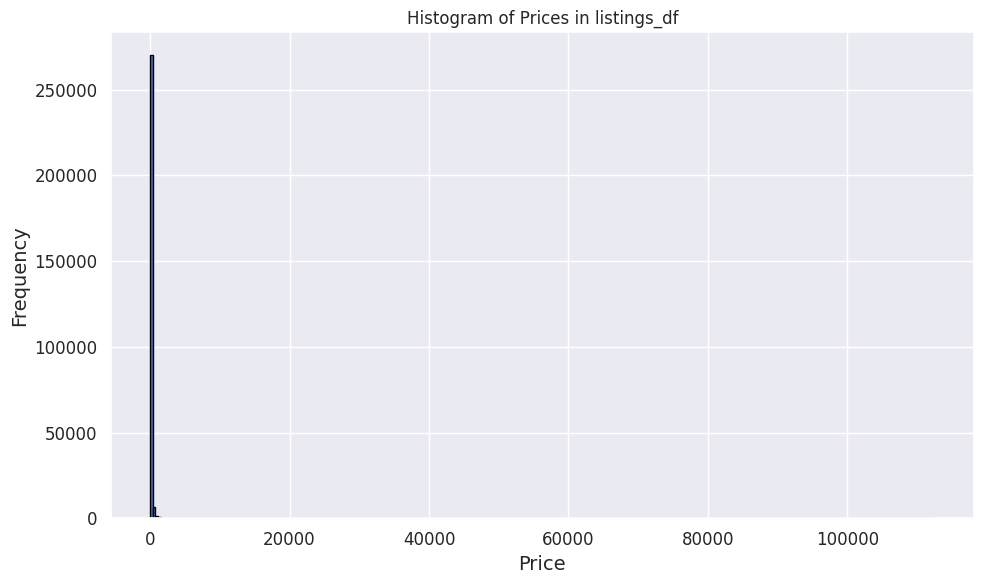

In [164]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(listings_df['price'], bins=300, edgecolor='black')

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices in listings_df')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

It seems that the vast majority of assets cost between 0 to 10,000 USD, but the range stretches to 100,000 USD. We will now review the summary of the distribution to get a better understanding of it.

In [165]:
# @title
summary = listings_df['price'].describe()

# Print the summary
print(summary)

count    279627.000000
mean        111.085620
std         397.474916
min           0.000000
25%          34.500000
50%          66.000000
75%         110.500000
max      112538.880000
Name: price, dtype: float64


Now we also know that 75% of the data is even below 110 USD. However, we don't want to miss important trends that might charactarize expensive assets, so we won't remove the entire 4th quartile. For now we will set 5000 as the threshold.We would also like to know better the assets we are about to remove.

In [166]:
# @title
print(listings_df[listings_df['price']>5000])

                                                         name    host_id  \
listing_id                                                                 
7225849                        Artistic apartment, Montmartre   34063120   
2243699                   SuperBowl Penthouse Loft 3,000 sqft    1483320   
2271504                      SUPER BOWL Brooklyn Duplex Apt!!   11598359   
14064312              Luxury 3 bedroom apartment on the beach   38278136   
28949579                                                 Apar  218213936   
21238053                                           Broadway 1  153497815   
31340283    2br - The Heart of NYC: Manhattans Lower East ...    4382127   
14948027     Apartamento com 2 quartos, 2 banheiros, uma sala   94062471   
13925864                                         Puerto Plata   58480311   
4737930                                    Spanish Harlem Apt    1235070   
11909226                  2 vagas e varandao  vista para mata   63368759   
2110145     

192 records are not that much compared to our 250,000+ listings. Now we wan to see how the distribution changes, if we decide to remove them.

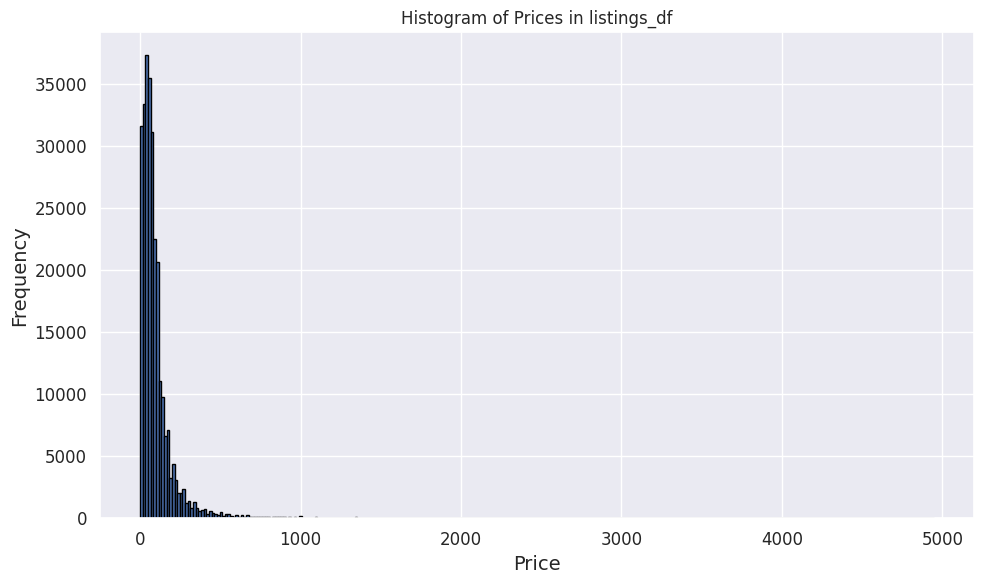

In [167]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram of the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(listings_df['price'][listings_df['price']<5000], bins=300, edgecolor='black')

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices in listings_df')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

It is still very much skewed, but the resolution is better. Now we will apply our outliers removal, also removing assets that are too cheap, assuming these are a mistake.

In [168]:
# @title
listings_df = listings_df[(listings_df['price']<5000) & (listings_df['price']>5)]

Disclaimr: we noticed that the most expensive assets tend to excel in service and facilities, which reflects in the review score. We recommend to pay attention to it in a future research of a larger scope.

We chose to focus on the 30 most common property types, removing the others as outliers. Then, we replaced the original columns with numerical columns using get_dummies.

In [169]:
# @title
value_counts  = listings_df['property_type'].value_counts()
value_counts = value_counts.head(30)

index_list = []
for index, row in listings_df.iterrows():
  if listings_df.loc[index, 'property_type'] not in value_counts.index:
    index_list.append(index)

listings_df = listings_df.drop(index_list)

property_type_type_dummies = pd.get_dummies(listings_df['property_type'], prefix='property_type')
property_type_type_dummies = property_type_type_dummies.astype(int)

listings_df = pd.concat([listings_df, property_type_type_dummies], axis=1)
listings_df = listings_df.drop(columns=['property_type'])

We assumed that amenities have effect on the price, but they were originally displayed in a way that was hard for us to deal with:

In [170]:
# @title
listings_df['amenities'].head(10)

listing_id
281420     ["Heating", "Kitchen", "Washer", "Wifi", "Long...
3705183    ["Shampoo", "Heating", "Kitchen", "Essentials"...
4082273    ["Heating", "TV", "Kitchen", "Washer", "Wifi",...
4797344    ["Heating", "TV", "Kitchen", "Wifi", "Long ter...
4823489    ["Heating", "TV", "Kitchen", "Essentials", "Ha...
4898654    ["Heating", "TV", "Kitchen", "Essentials", "Wa...
6021700    ["Shampoo", "TV", "Kitchen", "Washer", "Smoke ...
6945740    ["Heating", "TV", "Kitchen", "Essentials", "Wa...
7491966    ["Paid parking off premises", "Shampoo", "Heat...
7849932    ["Heating", "TV", "Iron", "Kitchen", "Essentia...
Name: amenities, dtype: object

To include amenities in our calculations, we first had to align all amenities to a unified format. Then, we chose the top 100 amenities that appear most frequently, and used get_dummies to add each amenity as a new binary column.

In [171]:
# @title
all_amenities = set()
for amenities in listings_df['amenities']:
    for amenity in amenities.split(', '):
        all_amenities.add(amenity.strip())
print(all_amenities)

import ast

# Convert the string representations of lists to actual lists (if needed)
listings_df['amenities'] = listings_df['amenities'].apply(ast.literal_eval)

# Flatten the list of amenities and create a set of unique amenities
unique_amenities = set(amenity for sublist in listings_df['amenities'] for amenity in sublist)

# Convert the set back to a list if needed
unique_amenities_list = list(unique_amenities)


amenities_count = {amenity: 0 for amenity in unique_amenities_list}

# Count occurrences of each amenity
for sublist in listings_df['amenities']:
    for amenity in sublist:
        if amenity in amenities_count:
            amenities_count[amenity] += 1

# Convert the dictionary to a DataFrame for better visualization
amenities_distribution_df = pd.DataFrame(list(amenities_count.items()), columns=['Amenity', 'Count'])

amenities_distribution_df


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = amenities_distribution_df['Count'].quantile(0.25)
Q3 = amenities_distribution_df['Count'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = amenities_distribution_df[(amenities_distribution_df['Count'] < lower_bound) |
                                     (amenities_distribution_df['Count'] > upper_bound)]

outliers_lower = amenities_distribution_df[amenities_distribution_df['Count'] < lower_bound]
outliers_upper = amenities_distribution_df[amenities_distribution_df['Count'] > upper_bound]


outliers_upper.sort_values(by='Count', ascending=True)


top_amenities = amenities_distribution_df.sort_values(by='Count', ascending=False).head(100)
our_ameneties = top_amenities.sort_values(by='Count', ascending=True)

# Extract the list of valid amenities from our_ameneties
valid_amenities = set(our_ameneties['Amenity'])  # assuming 'Amenity' is the column name in our_ameneties

# Function to filter amenities based on valid_amenities
def filter_amenities(amenities_list):
    return [amenity for amenity in amenities_list if amenity in valid_amenities]

# Apply the filtering function to the amenities column in listings_df
listings_df['our_amenities'] = listings_df['amenities'].apply(lambda x: filter_amenities(x))

# Now listings_df['amenities'] will only contain the amenities present in our_ameneties


# Flatten the list of amenities and create a set of unique amenities from the 'our_amenities' column
unique_amenities_new = set(amenity for sublist in listings_df['our_amenities'] for amenity in sublist)

# Convert the set back to a list if needed
unique_amenities_list_new = list(unique_amenities_new)
len(unique_amenities_list_new)



# Ensure that the original columns in listings_df remain unchanged
for amenity in unique_amenities_list_new:
    listings_df[amenity] = listings_df['our_amenities'].apply(lambda x: 1 if amenity in x else 0)

# Now listings_df should contain all original columns plus the new amenity columns
len(listings_df.columns.tolist())

{'"51\\" HDTV"', '"Shared outdoor infinity saltwater pool"', '"Free washer\\u2013In unit"]', '"MUHTEL\\u0130F MARKA conditioner"', '"Sonos Wireless Speakers Bluetooth sound system"', '"Laundromat nearby"', '"Wifi \\u2013 240 Mbps"]', '"variada conditioner"', '"ELECTROLUX refrigerator"', '"Paid washer\\u2013In unit"', '"Bosch stove"', '"Cooktop gas stove"', '"Acca Kappa shampoo"', '"Garden or backyard"', '"Game console: PS3"', '"Hote style sample size upon check in conditioner"', '"32\\" HDTV with Netflix', '["43\\" TV with standard cable"', '"Dove body soap"', '"samsung sound bar Bluetooth sound system"', '"40\\" HDTV with standard cable"', '"50\\" TV with Chromecast"', '"Air hockey table"', '"Apple & Bose  Bluetooth sound system"', '"Clothing storage: wardrobe and walk-in closet"', '"Vestel refrigerator"', '["Paid parking garage on premises \\u2013 1 space"', '"organic body soap"]', '["Ikea oven microwave combo stainless steel oven"', '"Dumbwaiter"', '"65\\" HDTV with Chromecast', '"B

<ipython-input-171-dad4aa3eb3a7>:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df[amenity] = listings_df['our_amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-171-dad4aa3eb3a7>:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df[amenity] = listings_df['our_amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-171-dad4aa3eb3a7>:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performanc

166

In [172]:
# @title
#removeing old versions of amenities and room_types
listings_df.drop(columns=['room_type','amenities','our_amenities'], inplace=True)
listings_df_after_amenities = listings_df.copy()

Now we want to check if there are any Nan left.

In [173]:
# @title
# Check for NaN values in the entire DataFrame
nan_summary = listings_df.isna().sum()

# Display the columns with their respective count of NaN values
print(nan_summary[nan_summary > 0])


name                160
host_location       790
district         227025
dtype: int64


As all the Nans are in string columns we plan to remove for the analysis, we are moving to the next step.

# Normalize assets per size

We suspected that the price is dependent on the asset's size. The closest measure we found for size is "accommodates". We will now check the possible correlation between them.

Correlation Coefficient: 0.3563627673186831
P-value: 0.0
The correlation is statistically significant.


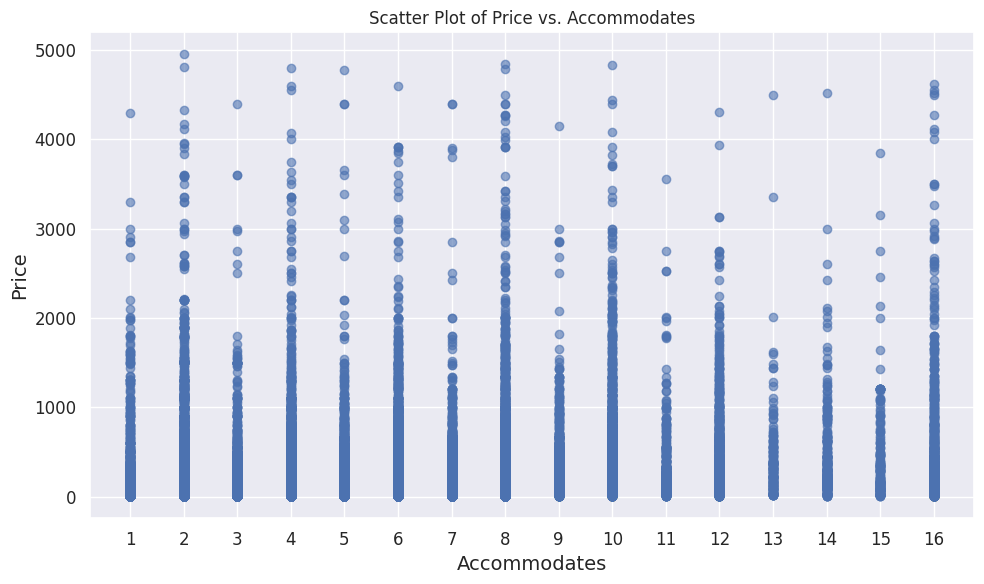

In [174]:
# @title
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
correlation_accommodates_price = listings_df['accommodates'].corr(listings_df['price'])

# Calculate the significance of the correlation
corr_coef, p_value = stats.pearsonr(listings_df['accommodates'], listings_df['price'])

# Print results
print(f"Correlation Coefficient: {correlation_accommodates_price}")
print(f"P-value: {p_value}")

# Determine significance level
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(listings_df['accommodates'], listings_df['price'], alpha=0.6)

# Set the labels and title
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Accommodates')

x_ticks = listings_df['accommodates'].unique()
plt.xticks(x_ticks)

# Show the plot
plt.tight_layout()
plt.show()

In [175]:
# @title
import pandas as pd
pd.set_option('display.max_columns', 200)

To be able to compare the price of different assets, which can host different number of guests, we created a new column that will be our target feature and main interest from now on - price_per_person. This neutralize the effect of number of accomodates, which is the closest measure we found for "size".

In [176]:
# @title
listings_df['price_per_person'] = listings_df['price'] / listings_df['accommodates']

<ipython-input-176-321f5742169b>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df['price_per_person'] = listings_df['price'] / listings_df['accommodates']


In [177]:
# @title
listings_df = listings_df.drop(columns = 'price')

Disclaimer: while the number of accomodates affect the price, we did notice they are not strongly correlated. Additionally, it can also imply on trends that this move prevents us from revealing in this research, including non-linear relations (e.g. +1 bed can imply a bigger appartment, or a more crowded appartment). We recommend looking into the correlation between them in a future research.

# Normalize Price per City

Checking if the avarage price in each city is different.

In [178]:
# @title
average_price_per_person_per_city = listings_df.groupby('city')['price_per_person'].mean().reset_index()

# Print the result
print("Average price per person per city:")
print(average_price_per_person_per_city)

Average price per person per city:
             city  price_per_person
0         Bangkok         21.325066
1       Cape Town         30.094422
2       Hong Kong         38.578521
3        Istanbul          5.781363
4     Mexico City         20.494561
5        New York         53.515319
6           Paris         41.688401
7  Rio de Janeiro         25.352277
8            Rome         30.394691
9          Sydney         42.541640


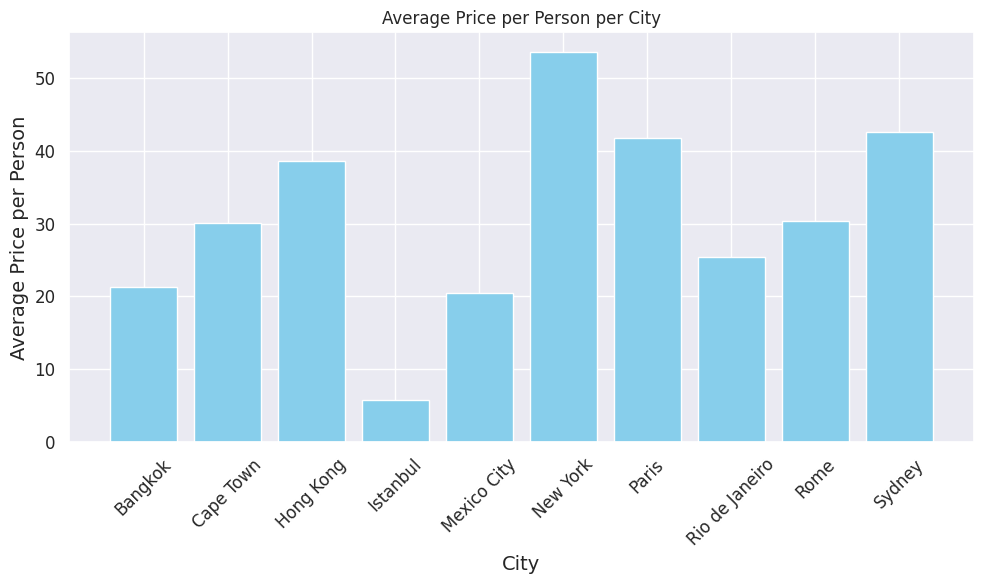

In [179]:
# @title
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_person_per_city['city'], average_price_per_person_per_city['price_per_person'], color='skyblue')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Average Price per Person')
plt.title('Average Price per Person per City')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

They do seem to be siginificantly different. We decided to normalize the prices by deviding each price by the asset's city avarage.

In [180]:
# @title
# Step 1: Map the average price_per_person per city to the original DataFrame
listings_df['price_per_person_avg'] = listings_df['city'].map(average_price_per_person_per_city.set_index('city')['price_per_person'])

# Step 2: Normalize the price by dividing price_per_person by the average price_per_person for each city
listings_df['normalized_price'] = listings_df['price_per_person'] / listings_df['price_per_person_avg']

# Print the updated DataFrame with the normalized price
print(listings_df[['city', 'price_per_person', 'price_per_person_avg', 'normalized_price']].head())


             city  price_per_person  price_per_person_avg  normalized_price
listing_id                                                                 
281420      Paris             29.15             41.688401          0.699235
3705183     Paris             66.00             41.688401          1.583174
4082273     Paris             48.95             41.688401          1.174188
4797344     Paris             31.90             41.688401          0.765201
4823489     Paris             33.00             41.688401          0.791587


<ipython-input-180-889f46aacc05>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df['price_per_person_avg'] = listings_df['city'].map(average_price_per_person_per_city.set_index('city')['price_per_person'])
<ipython-input-180-889f46aacc05>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df['normalized_price'] = listings_df['price_per_person'] / listings_df['price_per_person_avg']


In [181]:
# @title
listings_df = listings_df.drop(columns = ['price_per_person', 'price_per_person_avg'])
listings_df['price_per_person'] = listings_df['normalized_price']
listings_df = listings_df.drop(columns = 'normalized_price')
print(listings_df['price_per_person'].head())

<ipython-input-181-620671a0ee6b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df['price_per_person'] = listings_df['normalized_price']


listing_id
281420     0.699235
3705183    1.583174
4082273    1.174188
4797344    0.765201
4823489    0.791587
Name: price_per_person, dtype: float64


# Evaluating The Effect of Centrality On The Price
In this part we will suggest a new measure called "distance" which will represent the asset's distance from it city's center. Here we create this new feature.

In [182]:
# @title
from geopy.distance import geodesic
# a dictionary of the city names and the location of their center
city_centers = {"New York": (40.714494935069425, -74.0059527014823), "Paris": (48.85800851172243, 2.3513810222608997), "Bangkok": (13.757381759312889, 100.50182492571588),
                'Rio de Janeiro': (-22.903873105106634, -43.172771286090544), 'Sydney': (-33.86779644789998, 151.2090922467448), 'Istanbul': (41.00977773209523, 28.978425462687117),
                'Rome': (41.897548555332534, 12.482172863444589), 'Hong Kong': (22.31952219653581, 114.16930924110325), 'Mexico City': (19.433402387374997, -99.1331577195838),
                'Cape Town': (-33.92154340008573, 18.423049627685273)}

def calc_distince(row, dic):
  centere = dic[row['city']]
  return geodesic((float(row['latitude']), float(row['longitude'])), centere).kilometers

listings_df['distance_km'] = listings_df.apply(lambda row: calc_distince(row, city_centers), axis=1)

<ipython-input-182-22113cc05bf0>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df['distance_km'] = listings_df.apply(lambda row: calc_distince(row, city_centers), axis=1)


In [183]:
# @title
(listings_df['distance_km']).describe()

count    263699.000000
mean          6.898057
std           7.039802
min           0.009805
25%           2.591678
50%           4.609882
75%           8.494836
max          80.006008
Name: distance_km, dtype: float64

As different cities have different sizes, we decided to normalize the new column "distance_km" by dividing it by the city avarage.

In [184]:
# @title
listings_df['distance'] = listings_df['distance_km'] / listings_df.groupby('city')['distance_km'].transform('mean')

<ipython-input-184-05a6ec6f9f42>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  listings_df['distance'] = listings_df['distance_km'] / listings_df.groupby('city')['distance_km'].transform('mean')


In [185]:
# @title
(listings_df['distance']).describe()

count    263699.000000
mean          1.000000
std           0.789236
min           0.001290
25%           0.507146
50%           0.808304
75%           1.287456
max          10.300556
Name: distance, dtype: float64

In [186]:
# @title
listings_df = listings_df.drop(columns = 'distance_km')

We want to get a sense of the possibble correlation between distance and price. Below are a few graphs for this purpose.

<ipython-input-187-dc473c894764>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  distinct_colors = plt.cm.get_cmap('tab10', len(listings_df['city'].unique()))  # Use 'tab10' colormap for distinct colors


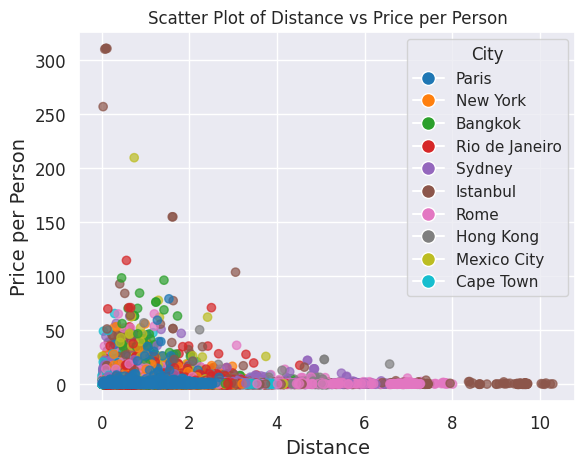

In [187]:
# @title
distinct_colors = plt.cm.get_cmap('tab10', len(listings_df['city'].unique()))  # Use 'tab10' colormap for distinct colors

# Get unique cities and create a color mapping
unique_cities = listings_df['city'].unique()
city_color_map = {city: distinct_colors(i) for i, city in enumerate(unique_cities)}

# Map the colors to the DataFrame
dot_colors = listings_df['city'].map(city_color_map)

# Create scatter plot
plt.scatter(listings_df["distance"], listings_df["price_per_person"],
            alpha=0.7, c=dot_colors)
plt.title("Scatter Plot of Distance vs Price per Person")
plt.xlabel("Distance")
plt.ylabel("Price per Person")
plt.grid(True)

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w',
                       markerfacecolor=city_color_map[city],
                       markersize=10) for city in unique_cities]
plt.legend(handles, unique_cities, title="City")

plt.show()

The graph of all cities implies that different cities have different patterns of distance-price relation. We will sample 3 cities and will plot their distribution to understand it better.

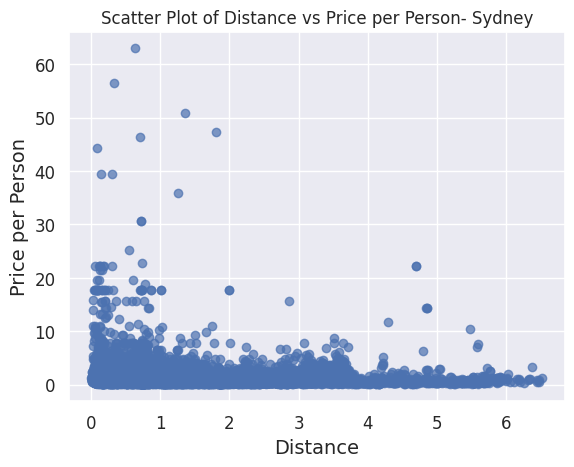

In [189]:
# @title
listings_df_Sydney = listings_df[listings_df['city'] == 'Sydney'].copy()
 # Create scatter plot
plt.scatter(listings_df_Sydney["distance"], listings_df_Sydney["price_per_person"],
            alpha=0.7)
plt.title("Scatter Plot of Distance vs Price per Person- Sydney")
plt.xlabel("Distance")
plt.ylabel("Price per Person")
plt.grid(True)

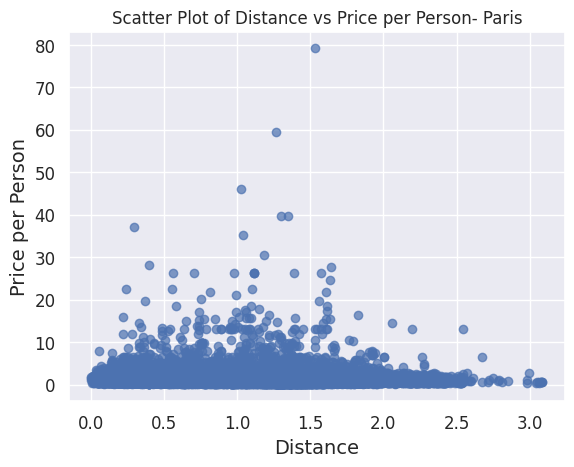

In [193]:
# @title
listings_df_Paris = listings_df[listings_df['city'] == 'Paris'].copy()
 # Create scatter plot
plt.scatter(listings_df_Paris["distance"], listings_df_Paris["price_per_person"],
            alpha=0.7)
plt.title("Scatter Plot of Distance vs Price per Person- Paris")
plt.xlabel("Distance")
plt.ylabel("Price per Person")
plt.grid(True)

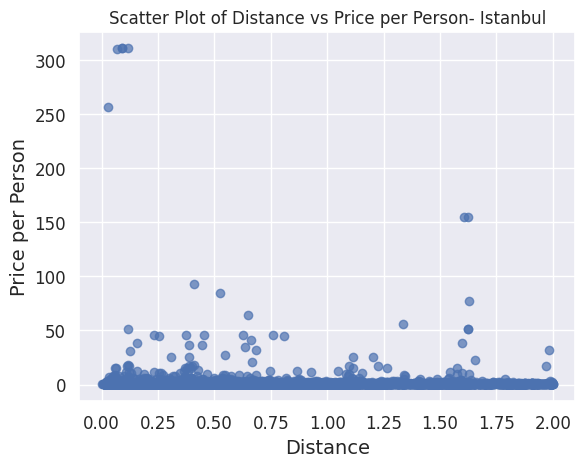

In [195]:
# @title
listings_df['city'] = listings_df_after_amenities['city']
listings_df_Istanbul = listings_df[(listings_df['city'] == 'Istanbul') & (listings_df['price_per_person'] < 500) & (listings_df['distance'] < 2)].copy()
#
# Create scatter plot
plt.scatter(listings_df_Istanbul["distance"], listings_df_Istanbul["price_per_person"],
            alpha=0.7)
plt.title("Scatter Plot of Distance vs Price per Person- Istanbul")
plt.xlabel("Distance")
plt.ylabel("Price per Person")
plt.grid(True)

It seems that the most expensive assets are closer to the center, but it might also be because the city center has more assets. We will plot a histogram of distance to see where are the majority of assets.

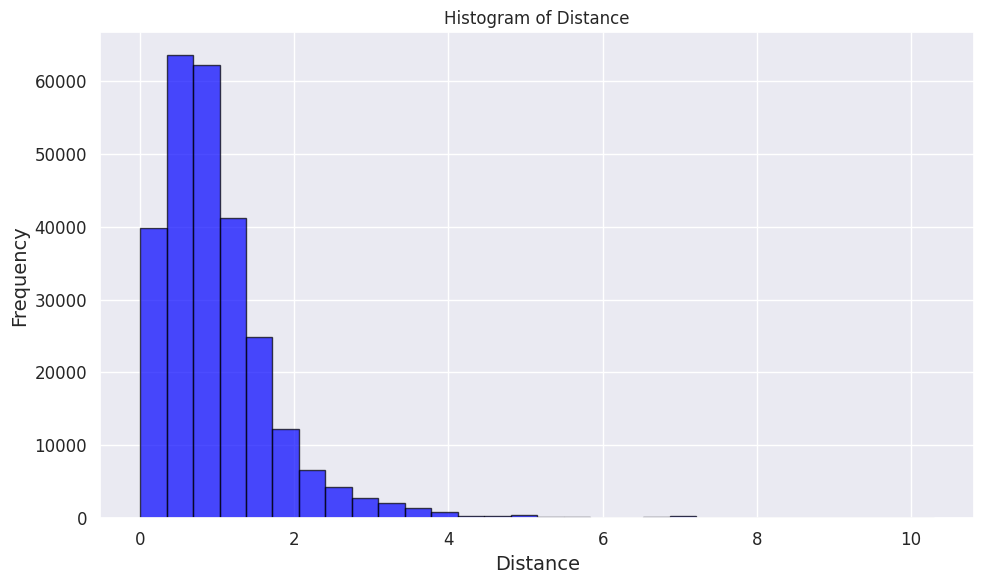

In [196]:
# @title
plt.figure(figsize=(10, 6))
plt.hist(listings_df['distance'], bins=30, alpha=0.7, color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distance')

# Show the plot
plt.tight_layout()
plt.show()

The graph above indicates that the majority of assets are very close to the center, both cheap and expensive. This will likely affect a linear regression model, since distance and price don't seem to be lineary correlated. We will further inspect this assumption during our feature selection process and an initial linear regression model.

# Feature Selection
Now we would like to detect the most significant features in our data, and to compare Distance to these features. As a first step we created a correlation matrix. Below are the strongest correlations between the features.

Removal of non-numeric columns.

In [197]:
# @title
numeric_listings_df = listings_df.copy()
numeric_listings_df = numeric_listings_df.drop(columns=['name','host_location','neighbourhood','district','city'])

In [198]:
# @title
pd.set_option('display.max_rows', 200)
correlation_matrix = numeric_listings_df.corr()

# Apply the filter: keep only correlations > 0.5 or < -0.5, and remove correlation of a feature with itself (1)
significant_correlations = correlation_matrix[((correlation_matrix > 0.5) & (correlation_matrix < 1)) | (correlation_matrix < -0.5)]

significant_correlations = significant_correlations.stack()
print("Significant correlations (|correlation| > 0.5):")
print(significant_correlations)

Significant correlations (|correlation| > 0.5):
host_id                                  host_since                                -0.929222
host_since                               host_id                                   -0.929222
host_response_time                       host_response_rate                        -0.779127
host_response_rate                       host_response_time                        -0.779127
accommodates                             bedrooms                                   0.670330
bedrooms                                 accommodates                               0.670330
review_scores_rating                     review_scores_accuracy                     0.777293
                                         review_scores_cleanliness                  0.728116
                                         review_scores_checkin                      0.654841
                                         review_scores_communication                0.703854
                      

We decided to remove host_id and room_type_Private room as they are highly correlated with other features.

In [199]:
# @title
numeric_listings_df = numeric_listings_df.drop(columns =['host_id','room_type_Private room'])

Importantly, price_per_person was not correlated with none of the features. This is another indication that the price is not lineary correlated with distance specifically, but also interesting to know that it is not lineary correlated with anything. To understand our target feature better, below are all the correlations with price_per_person. Additionnaly, we collected features we would like to remove manually.

In [200]:
# @title
for i in range(len(numeric_listings_df.columns)):
  if (numeric_listings_df[numeric_listings_df.columns[i]].corr(numeric_listings_df['price_per_person']) > 0.1) | (numeric_listings_df[numeric_listings_df.columns[i]].corr(numeric_listings_df['price_per_person']) < -0.1):
    print("correlation between", numeric_listings_df.columns[i], "and price_per_person:")
    print(numeric_listings_df[numeric_listings_df.columns[i]].corr(numeric_listings_df['price_per_person']))

correlation between price_per_person and price_per_person:
1.0


Indeed, the weak correlations suggest that price_per_person is not lineary related to the other features.

Feature selection - a simplisitic version of backward elimination
As a full process of backward elimination is out of the scope of this work, we decided to filter insignificant features unsing a non-iterative algoritm. The code below runs 1 model, calculates the R^2 of all the features, and remove the features that insignificantly contribute to the model, based on Bonferroni correction.

In [201]:
# @title
import statsmodels.api as sm
def feature_selection(X, y, significance_level=0.05):
  X = sm.add_constant(X)
  num_vars = X.shape[1]
  model = sm.OLS(y, X).fit()
  p_values = model.pvalues
  p_values = pd.DataFrame(p_values)
  excluded = p_values[p_values[0]>significance_level]
  print(excluded)

  return excluded.index

Y = numeric_listings_df['price_per_person']
p_value = 0.05/len(numeric_listings_df.columns)
listings_df_wt = numeric_listings_df.drop('price_per_person', axis = 1)
listings_df_selected_features = listings_df_wt.drop(columns = feature_selection(listings_df_wt, Y, p_value))
listings_df_selected_features

                                                         0
host_since                                        0.076606
host_response_time                                0.587454
host_response_rate                                0.432159
host_acceptance_rate                              0.148688
host_is_superhost                                 0.002431
host_has_profile_pic                              0.000340
host_identity_verified                            0.012084
latitude                                          0.157703
maximum_nights                                    0.871360
review_scores_rating                              0.889476
review_scores_accuracy                            0.521339
review_scores_checkin                             0.024391
review_scores_communication                       0.949879
review_scores_value                               0.003646
instant_bookable                                  0.019428
room_type_Entire place                            0.2575

host_total_listings_count  longitude  accommodates  bedrooms  \
listing_id                                                                 
281420                            1.0    2.33343             2       1.0   
3705183                           1.0    2.34515             2       1.0   
4082273                           1.0    2.31712             2       1.0   
4797344                           1.0    2.30584             2       1.0   
4823489                           1.0    2.26979             2       1.0   
...                               ...        ...           ...       ...   
38338635                          1.0    2.31419             2       1.0   
38538692                          1.0    2.33206             2       1.0   
38683356                          1.0    2.34920             2       1.0   
39659000                          1.0    2.38123             2       1.0   
40219504                          1.0    2.36320             2       1.0   

            minimum_nights  review_scores_cleanliness  review_scores_location  \
listing_id                                                                      
281420                   2                       10.0                    10.0   
3705183                  2                       10.0                    10.0   
4082273                  2                       10.0                    10.0   
4797344                  2                       10.0                    10.0   
4823489                  2                       10.0                    10.0   
...                    ...                        ...                     ...   
38338635                 1                       10.0                    10.0   
38538692                 7                       10.0                    10.0   
38683356                 6                       10.0                    10.0   
39659000                 3                       10.0                    10.0   
40219504                 2                       10.0                    10.0   

            room_type_Shared room  property_type_Entire house  \
listing_id                                                      
281420                          0                           0   
3705183                         0                           0   
4082273                         0                           0   
4797344                         0                           0   
4823489                         0                           0   
...                           ...                         ...   
38338635                        0                           0   
38538692                        0                           0   
38683356                        0                           0   
39659000                        0                           0   
40219504                        0                           0   

            property_type_Entire villa  \
listing_id                               
281420                               0   
3705183                              0   
4082273                              0   
4797344                              0   
4823489                              0   
...                                ...   
38338635                             0   
38538692                             0   
38683356                             0   
39659000                             0   
40219504                             0   

            property_type_Private room in apartment  \
listing_id                                            
281420                                            0   
3705183                                           0   
4082273                                           0   
4797344                                           0   
4823489                                           0   
...                                             ...   
38338635                                          0   
38538692                                          0   
38683356                  

Returning price_per_person.

In [202]:
# @title
listings_df_selected_features['price_per_person'] = listings_df['price_per_person']
listings_df_selected_features.columns

Index(['host_total_listings_count', 'longitude', 'accommodates', 'bedrooms',
       'minimum_nights', 'review_scores_cleanliness', 'review_scores_location',
       'room_type_Shared room', 'property_type_Entire house',
       'property_type_Entire villa', 'property_type_Private room in apartment',
       'property_type_Private room in hostel',
       'property_type_Private room in house',
       'property_type_Private room in townhouse',
       'property_type_Room in boutique hotel', 'property_type_Room in hostel',
       'property_type_Room in hotel', 'property_type_Shared room in hostel',
       'Bathroom essentials', 'Dedicated workspace', 'Free street parking',
       'Bathtub', 'Wifi', 'Room-darkening shades', 'Dryer', 'Pool',
       'Refrigerator', 'Nespresso machine', 'Dishes and silverware',
       'Beachfront', 'Breakfast', 'Hot tub', 'Essentials', 'Elevator',
       'Coffee maker', 'Free parking on premises', 'Cable TV', 'TV', 'Gym',
       'Air conditioning', 'Dishwasher', '

Is there a case? we would plot only Sydney to check if there is a certain relation.

In [203]:
# @title
listings_df_Sydney['price_per_person'].describe()

count    33091.000000
mean         1.000000
std          1.378567
min          0.019687
25%          0.511851
50%          0.748091
75%          1.133948
max         62.997101
Name: price_per_person, dtype: float64

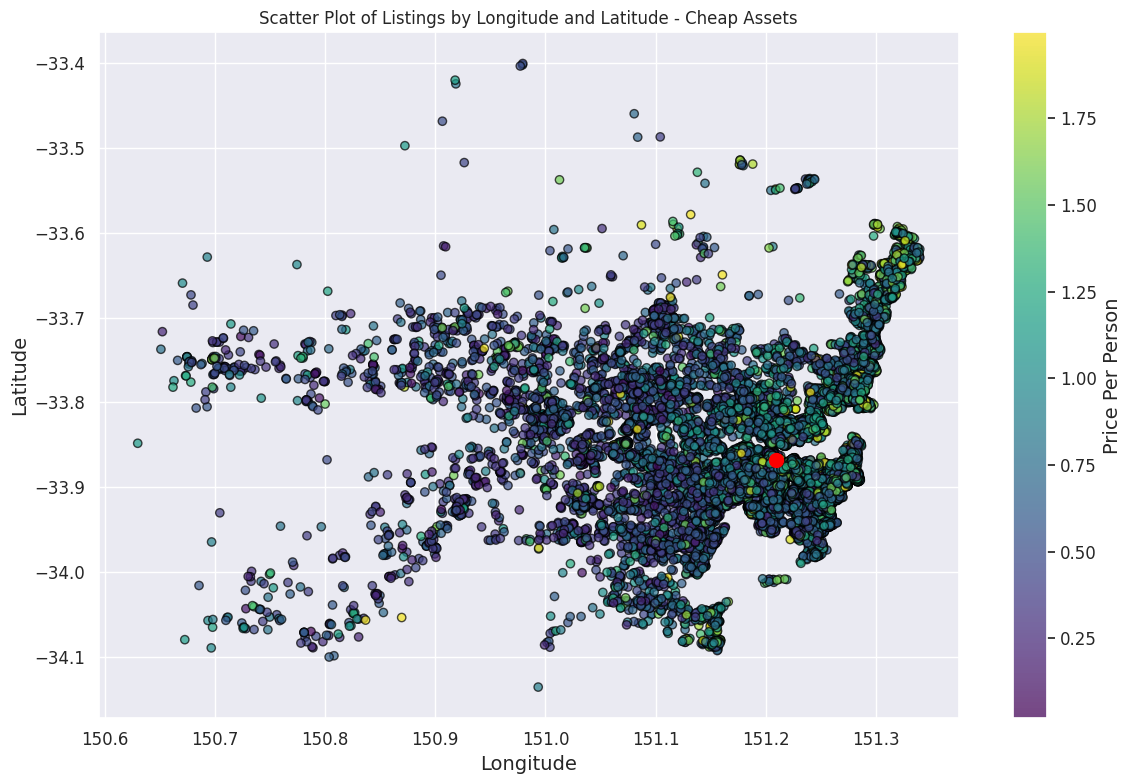

In [204]:
# @title
listings_df_Sydney_main = listings_df_Sydney[listings_df_Sydney['price_per_person']<2]
plt.figure(figsize=(12, 8))
scatter = plt.scatter(listings_df_Sydney_main['longitude'], listings_df_Sydney_main['latitude'],
                      c=listings_df_Sydney_main['price_per_person'],
                      cmap='viridis', alpha=0.7, edgecolor='black')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price Per Person')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Listings by Longitude and Latitude - Cheap Assets')


plt.scatter(151.2090922467448,-33.86779644789998, color='red', s=100, label='Sydny City Center')
# Show the plot
plt.tight_layout()
plt.show()

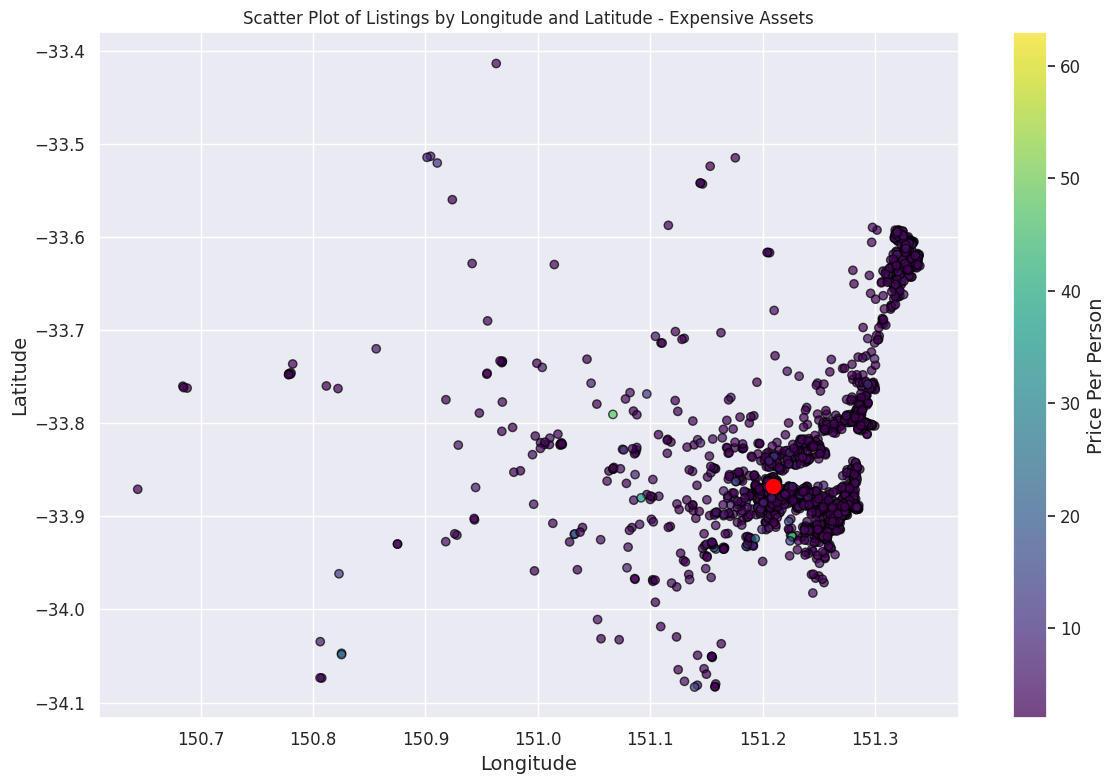

In [205]:
# @title
listings_df_Sydney_main = listings_df_Sydney[listings_df_Sydney['price_per_person']>2]
plt.figure(figsize=(12, 8))
scatter = plt.scatter(listings_df_Sydney_main['longitude'], listings_df_Sydney_main['latitude'],
                      c=listings_df_Sydney_main['price_per_person'],
                      cmap='viridis', alpha=0.7, edgecolor='black')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price Per Person')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Listings by Longitude and Latitude - Expensive Assets')


plt.scatter(151.2090922467448,-33.86779644789998, color='red', s=100, label='Sydny City Center')
# Show the plot
plt.tight_layout()
plt.show()

In [206]:
# @title
listings_df_Paris['price_per_person'].describe()

count    64375.000000
mean         1.000000
std          1.078093
min          0.021439
25%          0.593690
50%          0.791587
75%          1.121415
max         79.158709
Name: price_per_person, dtype: float64

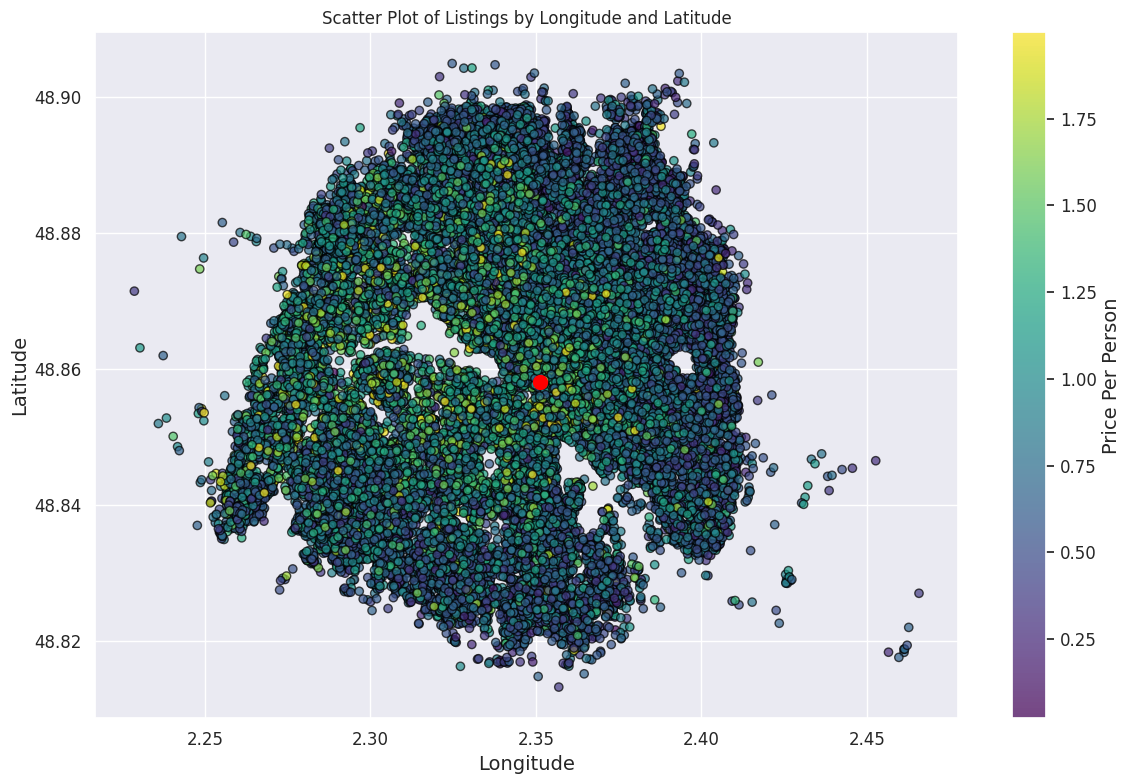

In [207]:
# @title
listings_df_Paris_main = listings_df_Paris[listings_df_Paris['price_per_person']<2]
plt.figure(figsize=(12, 8))
scatter = plt.scatter(listings_df_Paris_main['longitude'], listings_df_Paris_main['latitude'],
                      c=listings_df_Paris_main['price_per_person'],
                      cmap='viridis', alpha=0.7, edgecolor='black')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price Per Person')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Listings by Longitude and Latitude')

plt.scatter(2.3513810222608997, 48.85800851172243, color='red', s=100, label='Paris City Center')
# Show the plot
plt.tight_layout()
plt.show()

We see that in both cities one can't really recognize a certain pattern based on location, except for a subtle change of tone from the city center outwards.

 # Linear Regression Model

In [208]:
# @title
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = listings_df_selected_features.drop(columns='price_per_person')
y = listings_df_selected_features['price_per_person']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print("Intercept:", intercept)
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Predictions and evaluation
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: 0.6782565312738356
host_total_listings_count: 0.0006023242205274621
longitude: -0.0009814061238968153
accommodates: -0.11805745231530379
bedrooms: 0.13734325182689028
minimum_nights: 0.0005084116582754902
review_scores_cleanliness: 0.03904001924542969
review_scores_location: 0.05391748020198827
room_type_Shared room: -0.05654445086189113
property_type_Entire house: 0.34587535371994177
property_type_Entire villa: 1.3464389332558002
property_type_Private room in apartment: -0.13469721990739375
property_type_Private room in hostel: -0.25566901328196184
property_type_Private room in house: -0.13932264366538613
property_type_Private room in townhouse: -0.23469928663499445
property_type_Room in boutique hotel: 0.86362301412176
property_type_Room in hostel: -0.2864097910882696
property_type_Room in hotel: 0.6999050771810673
property_type_Shared room in hostel: -0.3188318311289574
Bathroom essentials: -0.20856914216115185
Dedicated workspace: -0.04100418627148503
Free street parking

The low R^2 probably confirms our intuition - the relation between price and distance is not linear. Sill, we would like to make sure it is not just that the different effects of different cities mask each other.

Turn the above code into a function

In [220]:
# @title
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
def lin_reg_without_me(y, df, x=None):
    # If x is None, use all columns except y
    if x is None:
        X = df.drop(columns=[y])
    else:
        X = df.drop(columns=[x, y])

    y_data = df[y]

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y_data)

    # Get the coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_

    # Print the intercept and coefficients
    print("Intercept:", intercept)
    for feature, coef in zip(X.columns, coefficients):
        print(f"{feature}: {coef}")

    # Predictions and evaluation
    y_pred = model.predict(X)
    mse = mean_squared_error(y_data, y_pred)
    r2 = r2_score(y_data, y_pred)

    print("Mean Squared Error:", mse)
    print("R^2 Score:", r2)

run separately for each city

In [221]:
# @title
# add 'city' again
listings_df['city'] = listings_df_after_amenities['city']

# FIRST WITH ALL FEATURES
# Get the unique cities from the DataFrame
unique_cities = listings_df['city'].unique()

# Loop through each city
for city in unique_cities:
    # Extract records for the current city into a new DataFrame
    listings_df_city = listings_df[listings_df['city'] == city].copy()

    # Remove specified columns
    columns_to_remove = ['name','host_location','neighbourhood','district','city']
    listings_df_city.drop(columns=columns_to_remove, inplace=True, errors='ignore')

    # Run the linear regression function
    lin_reg_without_me('price_per_person', listings_df_city)

    # Optionally, print a separator for clarity
    print(f"\n--- Finished analysis for city: {city} ---\n")

Intercept: 13.036406975966305
host_id: 5.408262454292006e-10
host_since: 0.017294479618771397
host_response_time: 0.012983574089191513
host_response_rate: 0.05286937294949436
host_acceptance_rate: 0.021938406781810638
host_is_superhost: 0.0026572414047762883
host_total_listings_count: 0.0005585243505830118
host_has_profile_pic: -0.054794283649638134
host_identity_verified: -0.03360277675668005
latitude: -0.05322542479858122
longitude: -3.917011547455619
accommodates: -0.13410774600533815
bedrooms: 0.10150643803756476
minimum_nights: 0.00031706777224493887
maximum_nights: -1.092164736427037e-08
review_scores_rating: 0.002203989360650249
review_scores_accuracy: 0.0022480074584393384
review_scores_cleanliness: 0.05557519721635695
review_scores_checkin: -0.022874766138764213
review_scores_communication: -0.0108374962640585
review_scores_location: 0.022650478113876216
review_scores_value: -0.0214944439388165
instant_bookable: 0.019068129761957098
room_type_Entire place: -0.3357217194274966


# Evaluating The Effect Of Socio-Economic Level Of an Asset's Area On The Price
# Case Study - Paris

In this part we will focus on Paris assets only, interpreting "location" as assets neighborhood, and thus socio-economic level.

# Additional Prepering Of The Data

We will use the dataframe listings_df_Paris, which includes Paris listings only.

In [219]:
# @title
listings_df_Paris

name   host_id  \
listing_id                                                                
281420         Beautiful Flat in le Village Montmartre, Paris   1466919   
3705183                       39 mÃÂ² Paris (Sacre CÃ
âur)  10328771   
4082273                   Lovely apartment with Terrace, 60m2  19252768   
4797344                   Cosy studio (close to Eiffel tower)  10668311   
4823489      Close to Eiffel Tower - Beautiful flat : 2 rooms  24837558   
...                                                       ...       ...   
38338635    Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...  31161181   
38538692                            Cozy Studio in Montmartre  10294858   
38683356              Nice and cosy mini-appartement in Paris   2238502   
39659000    Charming apartment near Rue Saint Maur / Oberk...  38633695   
40219504          Cosy apartment with view on Canal St Martin   6955618   

            host_since                 host_location  host_response_time  \
listing_id                                                                 
281420       12.876712  Paris, Ile-de-France, France                 1.0   
3705183      10.884932  Paris, Ile-de-France, France                 1.0   
4082273      10.216438  Paris, Ile-de-France, France                 1.0   
4797344      10.835616  Paris, Ile-de-France, France                 1.0   
4823489       9.843836  Paris, Ile-de-France, France                 1.0   
...                ...                           ...                 ...   
38338635      9.515068  Paris, Ile-de-France, France                 1.0   
38538692     10.890411  Paris, Ile-de-France, France                 1.0   
38683356     12.476712  Paris, Ile-de-France, France                 1.0   
39659000      9.257534  Paris, Ile-de-France, France                 1.0   
40219504     11.336986  Paris, Ile-de-France, France                 1.0   

            host_response_rate  host_acceptance_rate  host_is_superhost  \
listing_id                                                                
281420                     1.0                  0.98                  0   
3705183                    1.0                  0.98                  0   
4082273                    1.0                  0.98                  0   
4797344                    1.0                  0.98                  0   
4823489                    1.0                  0.98                  0   
...                        ...                   ...                ...   
38338635                   1.0                  0.98                  0   
38538692                   1.0                  0.98                  0   
38683356                   1.0                  0.98                  0   
39659000                   1.0                  0.98                  0   
40219504                   1.0                  0.98                  0   

            host_total_listings_count  host_has_profile_pic  \
listing_id                                                    
281420                            1.0                     1   
3705183                           1.0                     1   
4082273                           1.0                     1   
4797344                           1.0                     1   
4823489                           1.0                     1   
...                               ...                   ...   
38338635                          1.0                     1   
38538692                          1.0                     1   
38683356                          1.0                     1   
39659000                          1.0                     1   
40219504                          1.0                     1   

            host_identity_verified      neighbourhood district   city  \
listing_id                                                              
281420                           0  Buttes-Montmartre      NaN  Paris   
3705183                          1  Buttes-Montmartre      NaN  Paris   
4082

We mapped the assets to different Socio Economic (SE) levels.

In [212]:
# @title
import statsmodels.api as sm

# Step 2: Create the neighborhood scores and map them to a new column
neighborhood_scores = {
    'Buttes-Montmartre': 5.5,
    'Elysee': 9.0,
    'Vaugirard': 7.5,
    'Passy': 9.0,
    'Temple': 7.0,
    'Popincourt': 6.0,
    'Buttes-Chaumont': 5.0,
    'Opera': 8.0,
    'Gobelins': 6.5,
    'Hotel-de-Ville': 7.5,
    'Pantheon': 8.0,
    'Enclos-St-Laurent': 6.0,
    'Batignolles-Monceau': 7.0,
    'Luxembourg': 9.0,
    'Reuilly': 6.5,
    'Menilmontant': 5.5,
    'Observatoire': 7.0,
    'Palais-Bourbon': 9.5,
    'Bourse': 7.5,
    'Louvre': 8.5
}

listings_df_Paris['SE'] = listings_df_Paris['neighbourhood'].map(neighborhood_scores)

We will clean the data again, removing columns that are:
1. non-numerical
2. were converted to other columns
3. include location-related information
4. irrelevant

In [213]:
# @title
numerical_listings_df_Paris = listings_df_Paris.copy()
numerical_listings_df_Paris.drop(columns=['city', 'host_id','name','district','host_location', 'neighbourhood'], inplace=True)

In [214]:
# @title
numerical_listings_df_Paris

host_since  host_response_time  host_response_rate  \
listing_id                                                       
281420       12.876712                 1.0                 1.0   
3705183      10.884932                 1.0                 1.0   
4082273      10.216438                 1.0                 1.0   
4797344      10.835616                 1.0                 1.0   
4823489       9.843836                 1.0                 1.0   
...                ...                 ...                 ...   
38338635      9.515068                 1.0                 1.0   
38538692     10.890411                 1.0                 1.0   
38683356     12.476712                 1.0                 1.0   
39659000      9.257534                 1.0                 1.0   
40219504     11.336986                 1.0                 1.0   

            host_acceptance_rate  host_is_superhost  \
listing_id                                            
281420                      0.98                  0   
3705183                     0.98                  0   
4082273                     0.98                  0   
4797344                     0.98                  0   
4823489                     0.98                  0   
...                          ...                ...   
38338635                    0.98                  0   
38538692                    0.98                  0   
38683356                    0.98                  0   
39659000                    0.98                  0   
40219504                    0.98                  0   

            host_total_listings_count  host_has_profile_pic  \
listing_id                                                    
281420                            1.0                     1   
3705183                           1.0                     1   
4082273                           1.0                     1   
4797344                           1.0                     1   
4823489                           1.0                     1   
...                               ...                   ...   
38338635                          1.0                     1   
38538692                          1.0                     1   
38683356                          1.0                     1   
39659000                          1.0                     1   
40219504                          1.0                     1   

            host_identity_verified  latitude  longitude  accommodates  \
listing_id                                                              
281420                           0  48.88668    2.33343             2   
3705183                          1  48.88617    2.34515             2   
4082273                          0  48.88112    2.31712             2   
4797344                          1  48.84571    2.30584             2   
4823489                          0  48.85500    2.26979             2   
...                            ...       ...        ...           ...   
38338635                         1  48.82701    2.31419             2   
38538692                         1  48.89309    2.33206             2   
38683356                         1  48.88699    2.34920             2   
39659000                         1  48.86687    2.38123             2   
40219504                         1  48.87217    2.36320             2   

            bedrooms  minimum_nights  maximum_nights  review_scores_rating  \
listing_id                                                                   
281420           1.0               2            1125                 100.0   
3705183          1.0               2            1125                 100.0   
4082273          1.0               2            1125                 100.0   
4797344          1.0               2            1125                 100.0   
4823489          1.0               2            1125                 100.0   
...              ...             ...             ...                   ...   
38338635         1.0               1       

Reviewing the different levels and the possible correlation between price and SE.

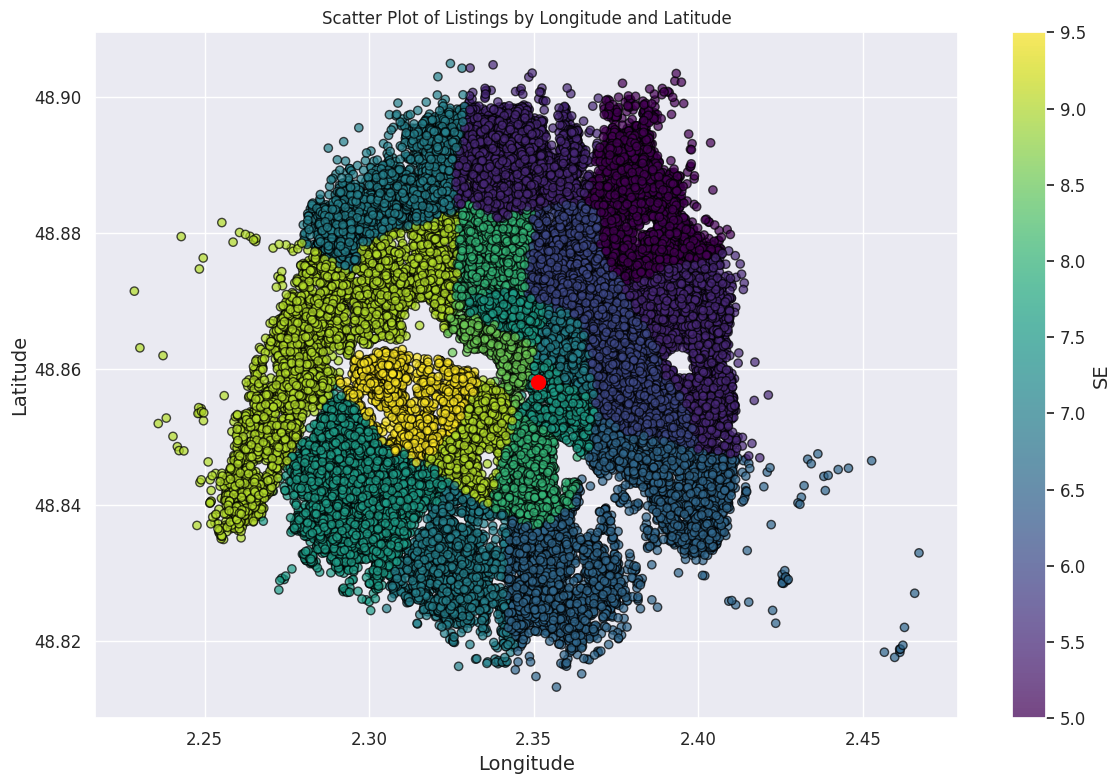

In [215]:
# @title
plt.figure(figsize=(12, 8))
scatter = plt.scatter(listings_df_Paris['longitude'], listings_df_Paris['latitude'],
                      c=listings_df_Paris['SE'],
                      cmap='viridis', alpha=0.7, edgecolor='black')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('SE')
# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Listings by Longitude and Latitude')

plt.scatter(2.3513810222608997, 48.85800851172243, color='red', s=100, label='Paris City Center')
# Show the plot
plt.tight_layout()
plt.show()

Correlation Coefficient: 0.1840601699932373
P-value: 0.0
The correlation is statistically significant.


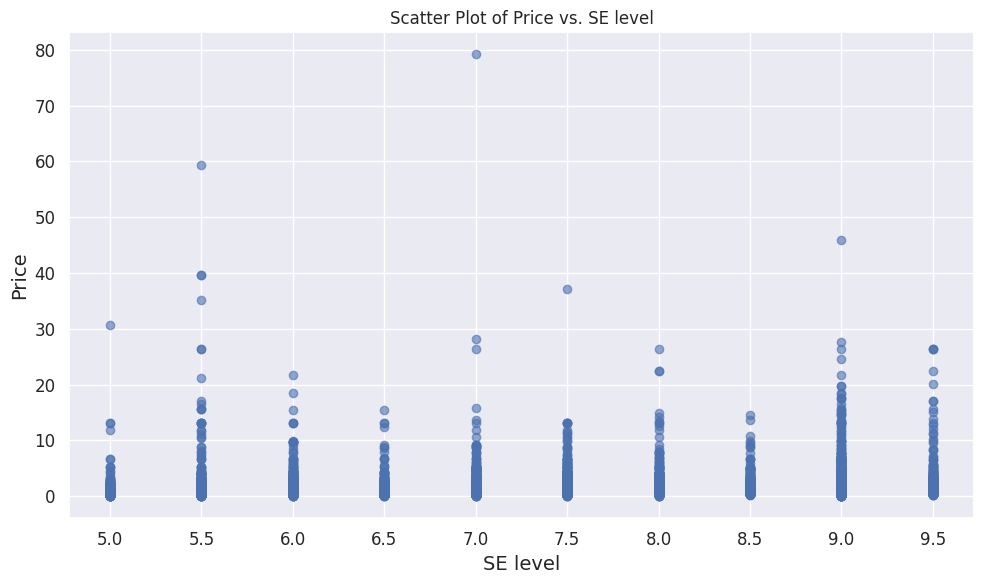

In [216]:
# @title
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
correlation_SE_price = listings_df_Paris['SE'].corr(listings_df_Paris['price_per_person'])

# Calculate the significance of the correlation
corr_coef, p_value = stats.pearsonr(listings_df_Paris['SE'], listings_df_Paris['price_per_person'])

# Print results
print(f"Correlation Coefficient: {correlation_SE_price}")
print(f"P-value: {p_value}")

# Determine significance level
alpha = 0.05  # Commonly used significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(listings_df_Paris['SE'], listings_df_Paris['price_per_person'], alpha=0.6)

# Set the labels and title
plt.xlabel('SE level')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. SE level')

x_ticks = listings_df_Paris['SE'].unique()
plt.xticks(x_ticks)

# Show the plot
plt.tight_layout()
plt.show()

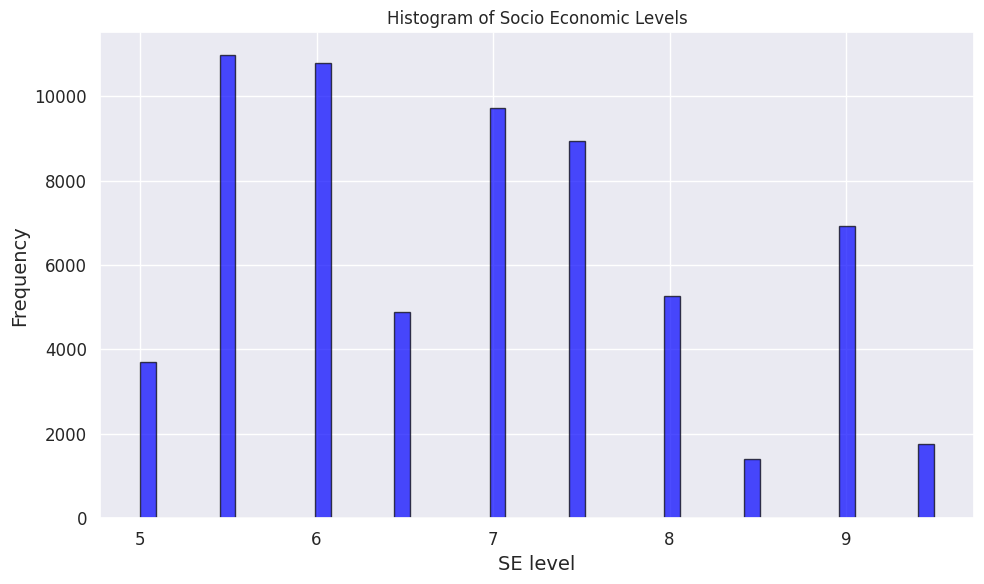

In [217]:
# @title
plt.figure(figsize=(10, 6))
plt.hist(listings_df_Paris['SE'], bins=50, alpha=0.7, color='blue', edgecolor='black')

# Set labels and title
plt.xlabel('SE level')
plt.ylabel('Frequency')
plt.title('Histogram of Socio Economic Levels')

# Show the plot
plt.tight_layout()
plt.show()

Here as well we get the impression that the relations between the price and the SE level are not linear. Just to be on the safe side, we will run a basic linear regression model.

In [218]:
# @title
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = numerical_listings_df_Paris.drop(columns='price_per_person')
y = numerical_listings_df_Paris['price_per_person']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients
print("Intercept:", intercept)
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Predictions and evaluation
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Intercept: -77.09557396927747
host_since: -0.0033181768603017963
host_response_time: 0.012065258757186614
host_response_rate: 0.047196080388197795
host_acceptance_rate: 0.023378929404661575
host_is_superhost: 0.000903886799980172
host_total_listings_count: 0.0005058588068408421
host_has_profile_pic: -0.049706410579885105
host_identity_verified: -0.03236878578923022
latitude: 1.6522262047476748
longitude: -1.213291508855578
accommodates: -0.1339343266298017
bedrooms: 0.0989924504083407
minimum_nights: 0.00031106480170242645
maximum_nights: -7.815018715495725e-09
review_scores_rating: 0.002254916038452792
review_scores_accuracy: 0.004328032571755597
review_scores_cleanliness: 0.05476470115434556
review_scores_checkin: -0.02402461934629141
review_scores_communication: -0.00799054072591554
review_scores_location: 0.01401703132995924
review_scores_value: -0.020574571648431156
instant_bookable: 0.017328068802713537
room_type_Entire place: -0.3166166218612964
room_type_Hotel room: 0.404922422

Aligned with our previous suspicion, we conclude that the relations between price and SE level are also non-linear, and therefore we recommend that a future research will use a non-linear model to measure this effect.

# Conclusion

We started the work with the hypothesis that price and location are lineary correlated. We assumed that there are locations which are more attractive than others, and therefore the assets in these locations would be more expensive than peripheral assets.
During the process we discovered not only that price and location are not lineary correlated, but that price is not lineary correlated with any of the asset's features.
We had additional attempts that failed, which we decided to exclude from the work,such as dividing the data to train and test sets. We concluded that most of the tools we learned during the semester help us to avoid overfitting and to make sure the model will know to deal with unknown data. As we see that our initial attemps of linear regression model, in which it should perform best (the model has all the data) - are failing, we figured further steps are redundant at this point.
Nevertheless, the differences between assets in different cities do support, even though partially, in our initial hypothesis (after all, they do represent different locations - but in a low resolution). We believe that such sub-division also exists withing cities, but in this work we were unable to uncover it.
Therefore, our main recommendation for future research is to use a non-linear model for price prediction of AirBNB assets.